# Visão geral e pré-processamento dos dados

In [1]:
# Importando as bibliotecas mais básicas que vou usar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Datasets escolhidos, pré-processamento e análise exploratória de dados

#### Dataset 1: [Polycistic Ovary Syndrome - PCOS](https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos?select=PCOS_data_without_infertility.xlsx)

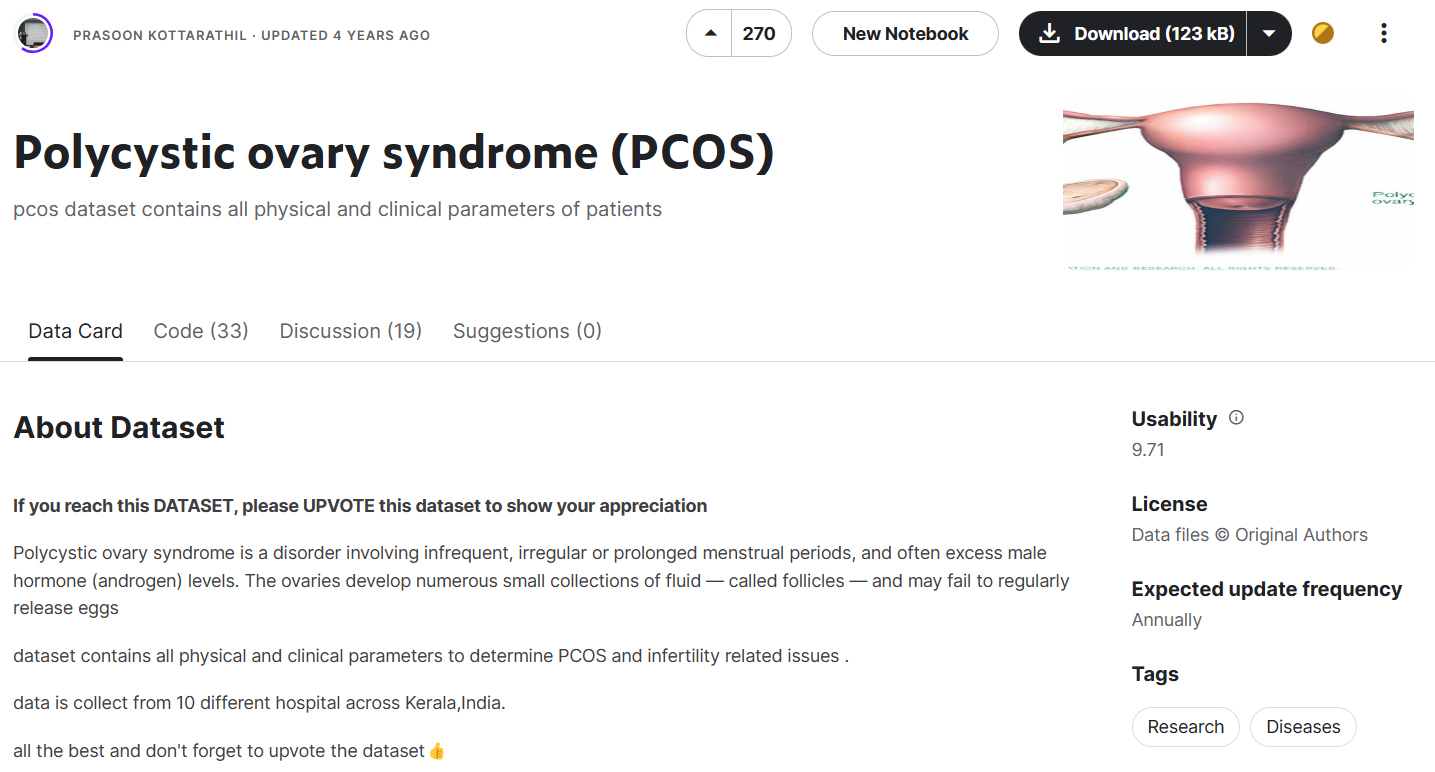

Os dataset 1 [Polycistic Ovary Syndrome - PCOS](https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos?select=PCOS_data_without_infertility.xlsx) contém dados de portadoras ou não de Síndrome do Ovário Policístico SOP, de 10 hospitais diferentes na Índia. Os dados utilizados representam as respostas a um questionário de mulheres diagnosticadas ou não com PCOS, relacionando diversos achados clínicos de cada paciente. O dataset subdivide-se em pacientes sem infertilidade e com infertilidade, mas os dados para as pacientes inférteis têm poucos atributos e, por este motivo, foram excluídos desta análise.

Embora não tenha sido publicado em conjunto com um artigo, esse conjunto de dados já foi utilizado em diversos artigos publicados, o que valida sua qualidade.

##### Importando dados e exibindo

In [2]:
dataset_1 = pd.read_excel("../data/dataset1-pcos-wo_infertility.xlsx",  sheet_name=1)
dataset_1.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


Esse dataset tem inúmeras features, envolvendo exames de sangue e até mesmo informações sobre achados ultrassonográficos (número de folículos ovarianos em cada ovário, tamanho dos folículos). Por isso, ele é um conjunto de dados com informações muito ricas, que contém variáveis associadas a todos os sintomas da SOP que abordamos anteriormente.

Apesar disso, é importante levar em conta que informações tão completas são, em alguns casos, difíceis de obter. Dados como esses poderiam ser úteis se pensarmos em sistemas de apoio à decisão em um cenário de pacientes já com suspeita da SOP, em que tivessem sido coletados já inúmeros exames e informações. Poderíamos usar modelos de aprendizado de máquina para gerar uma segunda opinião em relação ao diagnóstico médico, por exemplo.

##### Pré-processamento e Análise Exploratória dos Dados

A minha proposta, nesse projeto, é usar dados de dois datasets distintos, e por isso, tive que descartar muitas das features nesse dataset, selecionando apenas aquelas também presentes no dataset 2. Também descartei a feature sobre o grupo sanguíneo da paciente, pois em outras análises breves percebi que não é relevante para a predição.

In [15]:
dataset_1 = dataset_1.rename(columns={" Age (yrs)": "Idade",
                                      "Weight (Kg)": "Peso",
                                      "Height(Cm) ": "Altura",
                                      "Cycle(R/I)": "Menstruação regular",
                                      "Weight gain(Y/N)": "Ganho de peso",
                                      "Skin darkening (Y/N)": "Hiperpigmentação da pele",
                                      "Hair loss(Y/N)": "Queda de cabelo",
                                      "Pimples(Y/N)": "Acne",
                                      "Fast food (Y/N)": "Fast food regular",
                                      "Reg.Exercise(Y/N)": "Atividade física regular",
                                      "PCOS (Y/N)": "Diagnóstico SOP",
                                      "Cycle length(days)": "Duração do período menstrual",
                                      "hair growth(Y/N)": "Hirsutismo"
                                     })

discard_columns = ['Sl. No', 'Patient File No.', 'BMI', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
                       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', '  I   beta-HCG(mIU/mL)',
                       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
                       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
                       'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
                       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Blood Group',
                       'Unnamed: 44']

dataset_1 = dataset_1.drop(columns=discard_columns)

In [16]:
dataset_1 = dataset_1[sorted(dataset_1.columns)]

dataset_1.info()
dataset_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Acne                          541 non-null    int64  
 1   Altura                        541 non-null    float64
 2   Atividade física regular      541 non-null    int64  
 3   Diagnóstico SOP               541 non-null    int64  
 4   Duração do período menstrual  541 non-null    int64  
 5   Fast food regular             540 non-null    float64
 6   Ganho de peso                 541 non-null    int64  
 7   Hiperpigmentação da pele      541 non-null    int64  
 8   Hirsutismo                    541 non-null    int64  
 9   Idade                         541 non-null    int64  
 10  Menstruação regular           541 non-null    int64  
 11  Peso                          541 non-null    float64
 12  Queda de cabelo               541 non-null    int64  
dtypes: fl

,Acne,Altura,Atividade física regular,Diagnóstico SOP,Duração do período menstrual,Fast food regular,Ganho de peso,Hiperpigmentação da pele,Hirsutismo,Idade,Menstruação regular,Peso,Queda de cabelo
0,0,152.0,0,0,5,1.0,0,0,0,28,2,44.6,0
1,0,161.5,0,0,5,0.0,0,0,0,36,2,65.0,0
2,1,165.0,0,1,5,1.0,0,0,0,33,2,68.8,1
3,0,148.0,0,0,5,0.0,0,0,0,37,2,65.0,0
4,0,161.0,0,0,5,0.0,0,0,0,25,2,52.0,1


In [17]:
dataset_1['Menstruação regular'].value_counts()

Menstruação regular
2    390
4    150
5      1
Name: count, dtype: int64

De acordo com usuários do Kaggle, o valor 4 representa uma menstruação regular neste dataset, e 2 representa irregularidade nos ciclos.

Obs: o autor do dataset, em si, não explica isso, o que é uma falha na documentação do dataset. Mas em muitos notebooks de usuários, com muitos upvotes, observei isso, então acredito que esteja correto.

In [18]:
dataset_1['Menstruação regular'] = dataset_1['Menstruação regular'].replace({4: 0, 2: 1})
dataset_1 = dataset_1[dataset_1['Menstruação regular'] != 5]
dataset_1['Menstruação regular'].value_counts()

Menstruação regular
1    390
0    150
Name: count, dtype: int64

In [19]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 540
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Acne                          540 non-null    int64  
 1   Altura                        540 non-null    float64
 2   Atividade física regular      540 non-null    int64  
 3   Diagnóstico SOP               540 non-null    int64  
 4   Duração do período menstrual  540 non-null    int64  
 5   Fast food regular             539 non-null    float64
 6   Ganho de peso                 540 non-null    int64  
 7   Hiperpigmentação da pele      540 non-null    int64  
 8   Hirsutismo                    540 non-null    int64  
 9   Idade                         540 non-null    int64  
 10  Menstruação regular           540 non-null    int64  
 11  Peso                          540 non-null    float64
 12  Queda de cabelo               540 non-null    int64  
dtypes: float64

Eliminando instância (somente uma) com valor ausente na feature Fast food regular:

In [ ]:
dataset_1.dropna(subset=["Fast food regular"], inplace=True)

dataset_1["Fast food regular"] = dataset_1["Fast food regular"].astype(int)

dataset_1 = dataset_1[['Diagnóstico SOP'] + sorted([col for col in dataset_1.columns if col != 'Diagnóstico SOP'])]

dataset_1.sort(dataset_1.columns).info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 0 to 540
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Diagnóstico SOP               539 non-null    int64  
 1   Acne                          539 non-null    int64  
 2   Altura                        539 non-null    float64
 3   Atividade física regular      539 non-null    int64  
 4   Duração do período menstrual  539 non-null    int64  
 5   Fast food regular             539 non-null    int64  
 6   Ganho de peso                 539 non-null    int64  
 7   Hiperpigmentação da pele      539 non-null    int64  
 8   Hirsutismo                    539 non-null    int64  
 9   Idade                         539 non-null    int64  
 10  Menstruação regular           539 non-null    int64  
 11  Peso                          539 non-null    float64
 12  Queda de cabelo               539 non-null    int64  
dtypes: float64

<ipython-input-53-97fc13e39b04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_1.dropna(subset=["Fast food regular"], inplace=True)
<ipython-input-53-97fc13e39b04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_1["Fast food regular"] = dataset_1["Fast food regular"].astype(int)


Observando a correlação entre cada variável e o Diagnóstico de SOP:

In [ ]:
correlation_with_target_ds_1 = dataset_1.corr()['Diagnóstico SOP'].abs().sort_values(ascending=False)
print(correlation_with_target_ds_1)

Diagnóstico SOP                 1.000000
Hiperpigmentação da pele        0.476799
Hirsutismo                      0.461935
Ganho de peso                   0.443652
Menstruação regular             0.401145
Fast food regular               0.376399
Acne                            0.288609
Peso                            0.209010
Duração do período menstrual    0.183781
Queda de cabelo                 0.177458
Idade                           0.166299
Atividade física regular        0.069481
Altura                          0.065106
Name: Diagnóstico SOP, dtype: float64


Observamos que as cinco variáveis de maior correlação com o diagnóstico da doença, nesse dataset, são:

* Hiperpigmentação da pele
* Hirsutismo
* Ganho de peso
* Menstruação regular
* Fast food regular

Agora, analisando a correlação entre as features do dataset 1:

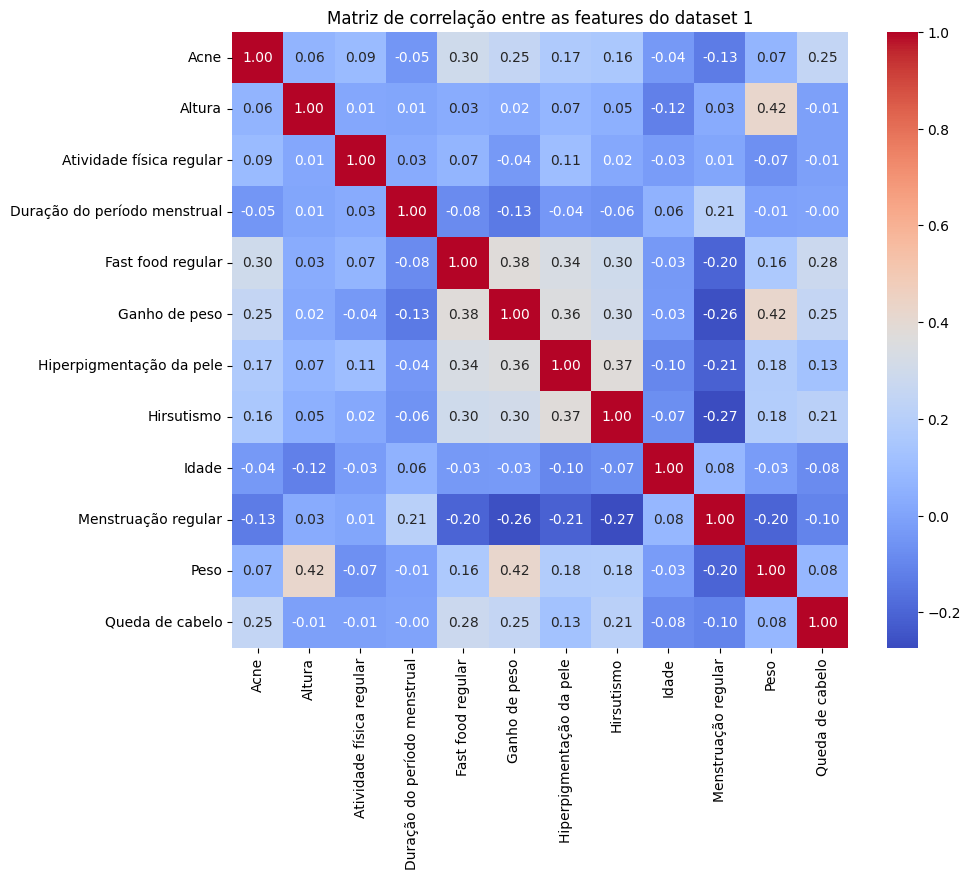

In [ ]:
features = dataset_1.drop(columns=['Diagnóstico SOP'])
correlation_matrix = features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de correlação entre as features do dataset 1')
plt.show()

Podemos observar que as variáveis, em geral, não têm correlação muito alta, a não ser por "Peso" e "Altura", o que faz sentido. Agora, observando a distribuição das variáveis em cada feature:

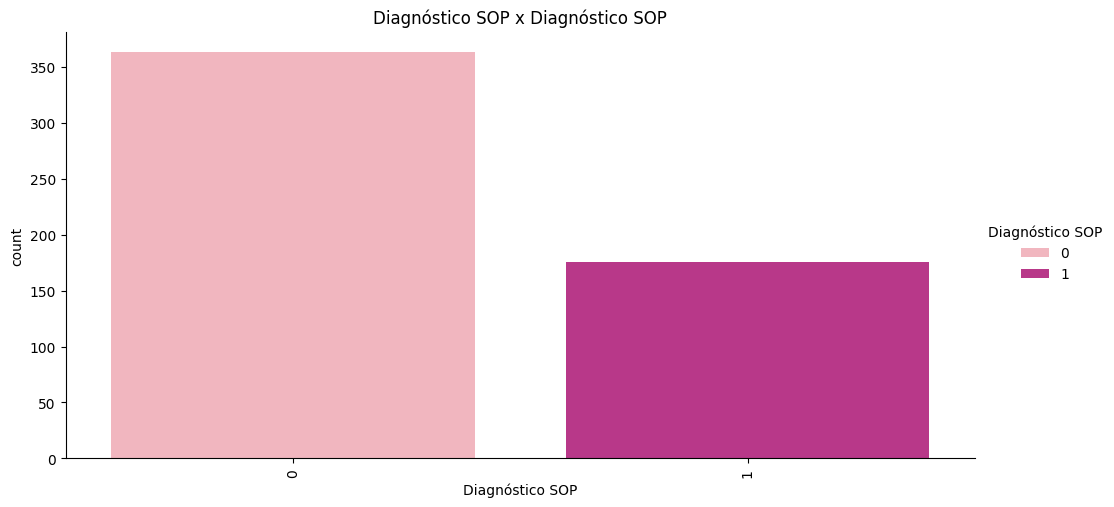

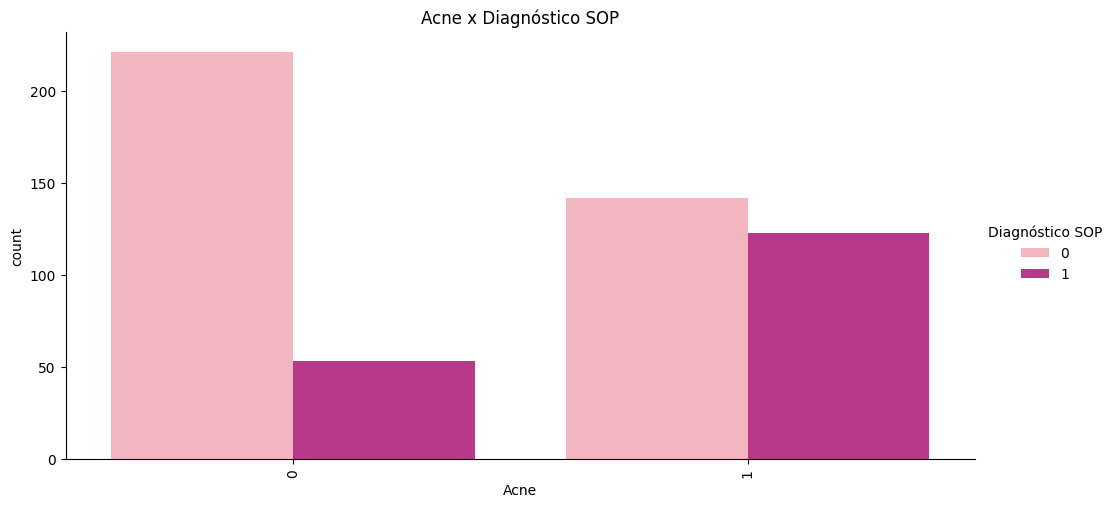

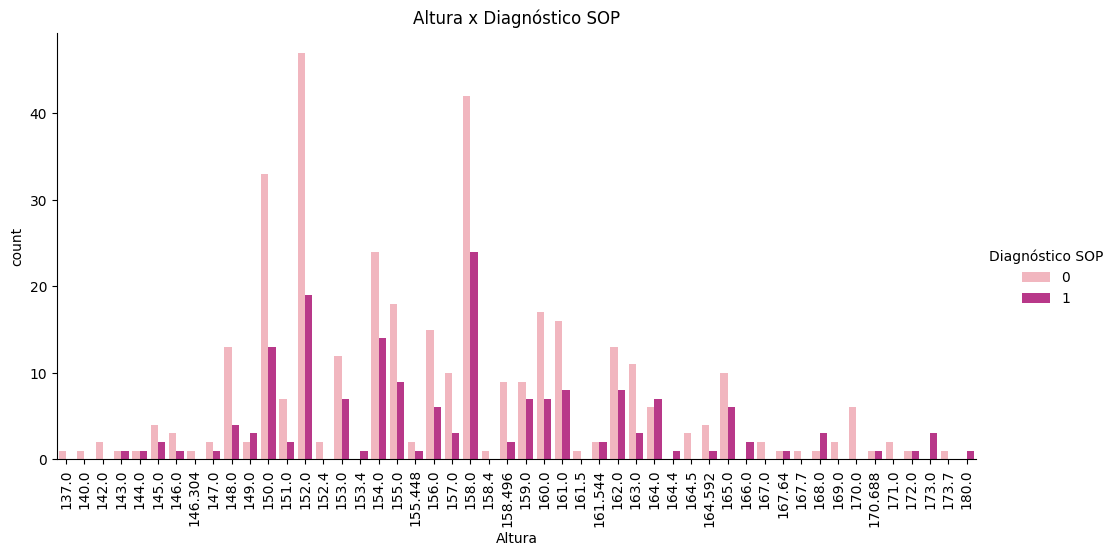

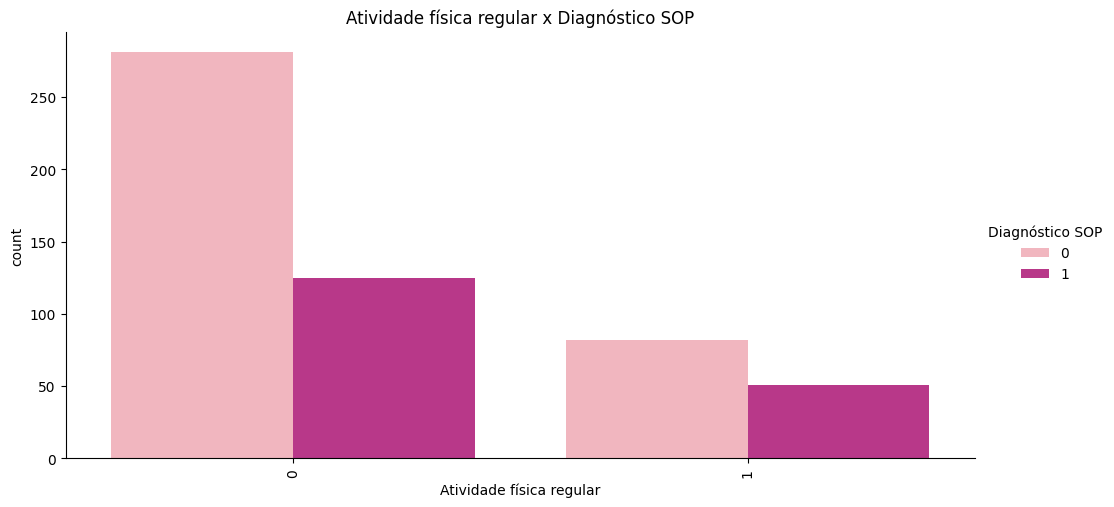

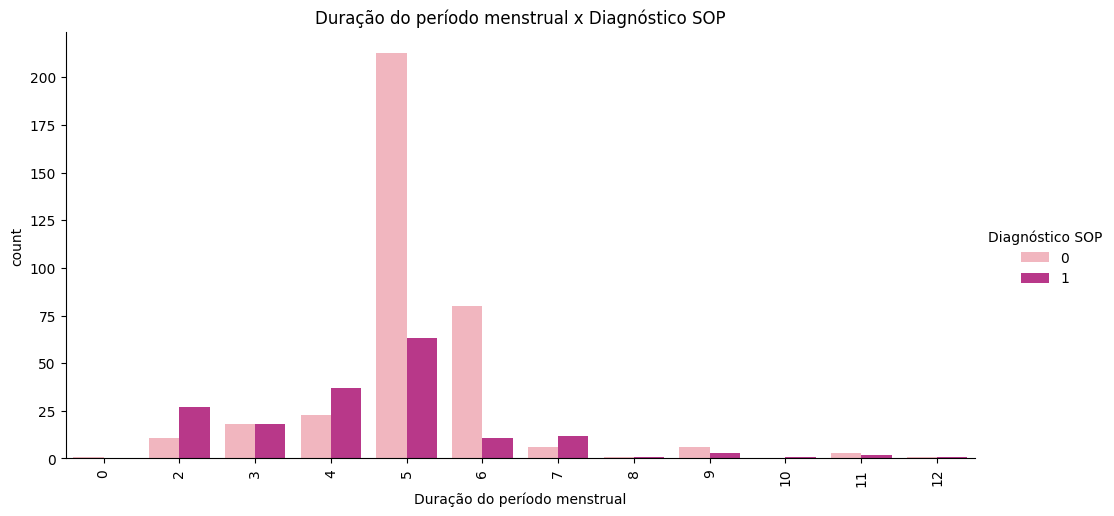

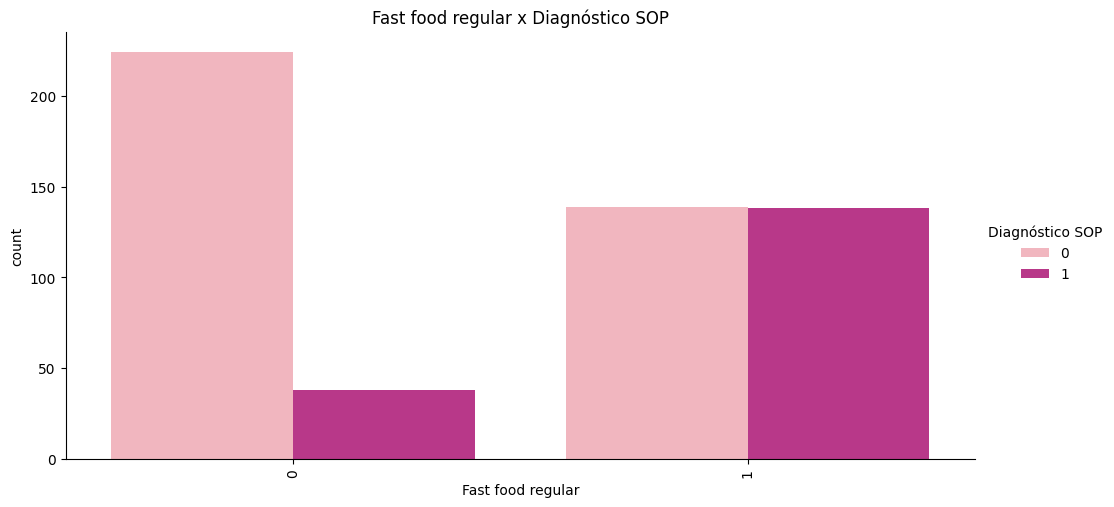

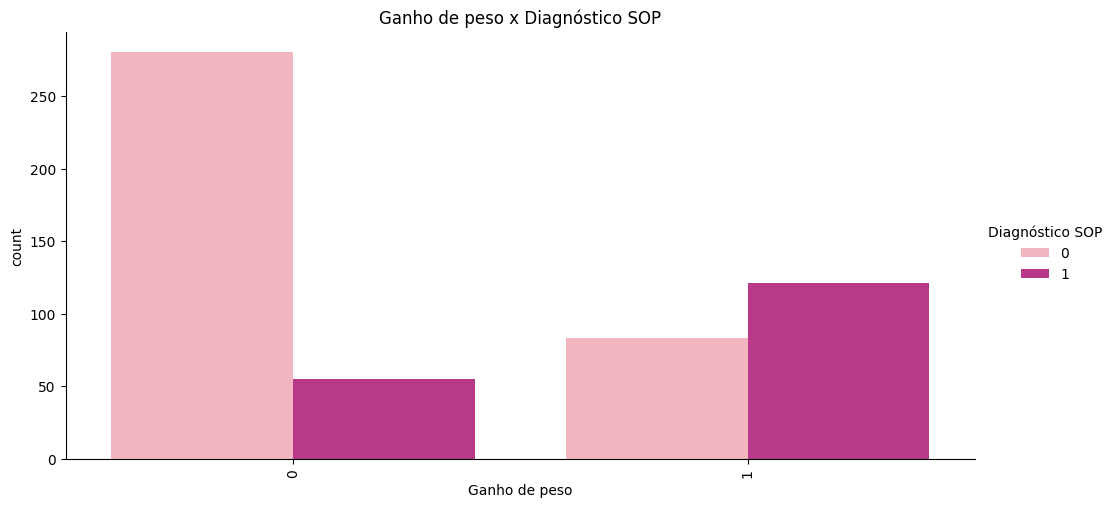

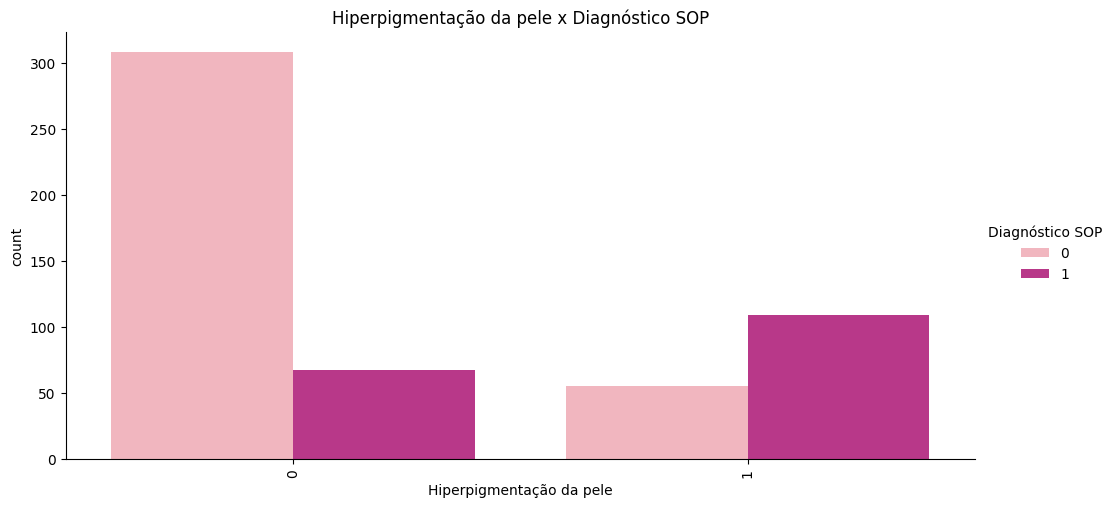

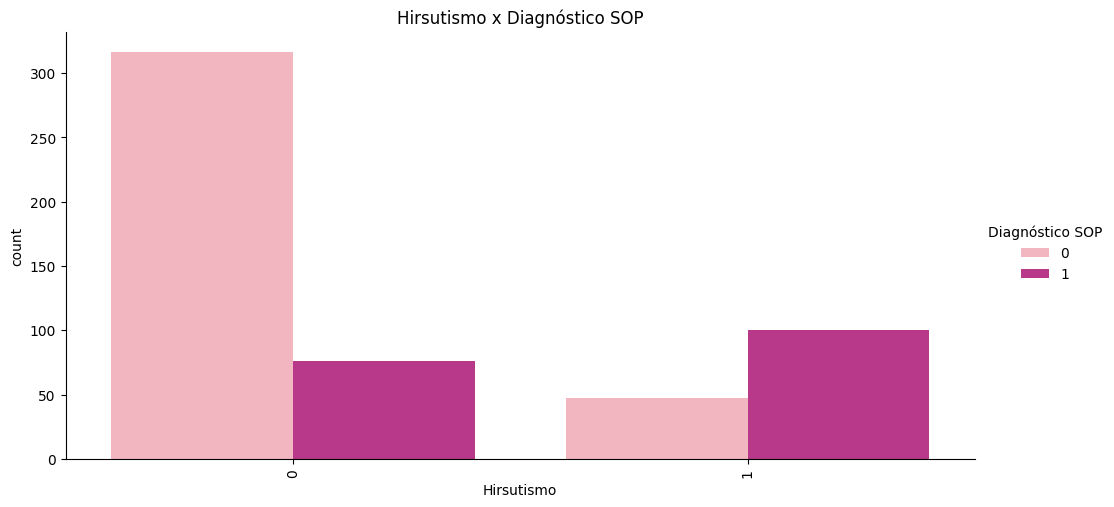

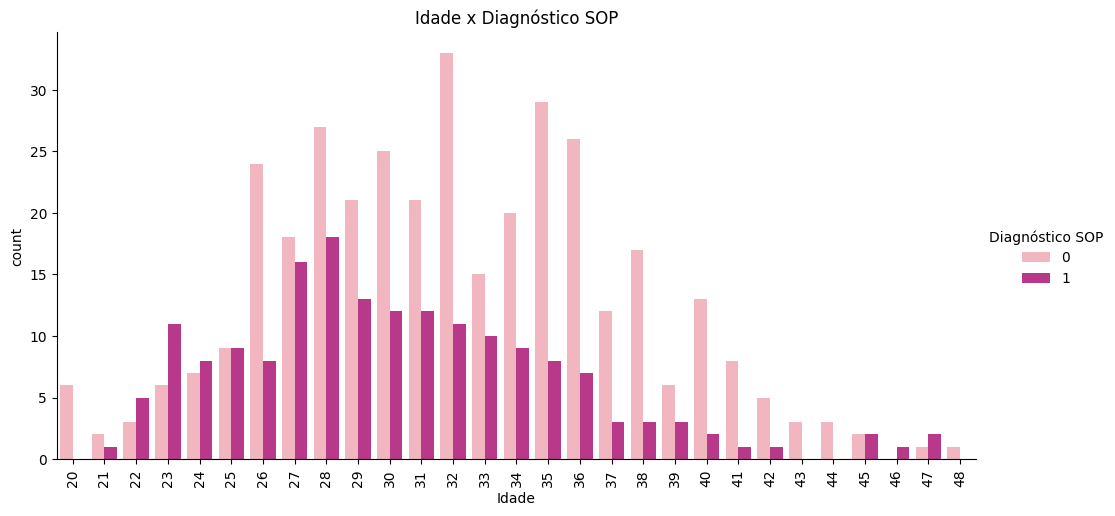

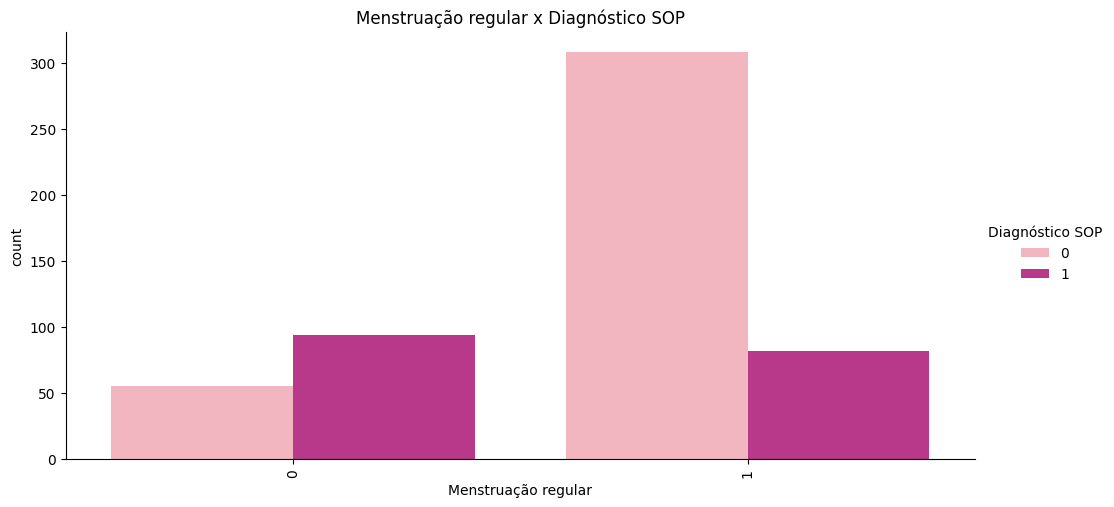

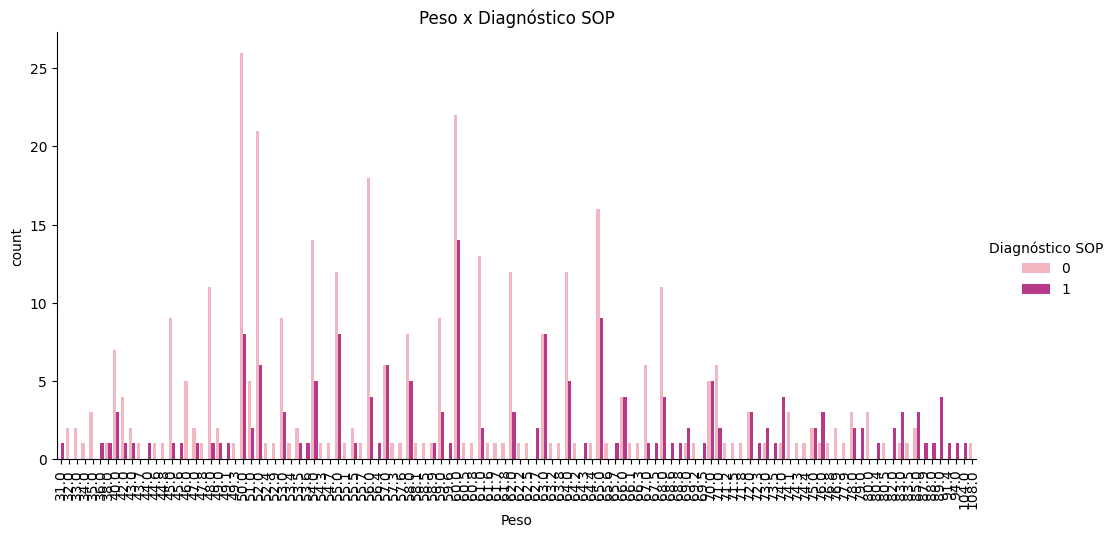

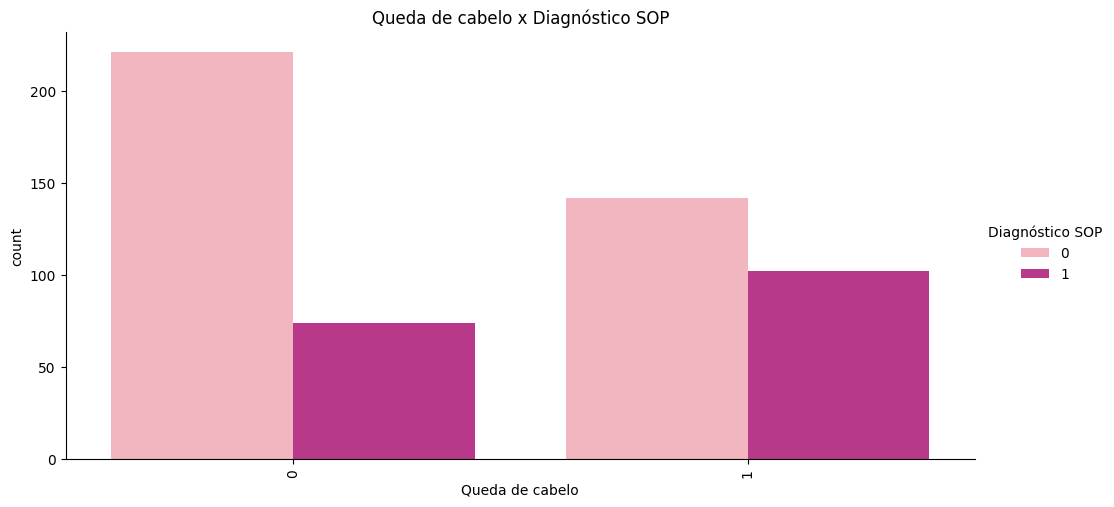

In [ ]:
for feature in dataset_1.columns:
    g = sns.catplot(data=dataset_1, x=feature, hue="Diagnóstico SOP", kind="count", palette="RdPu",height=5,aspect=2)
    g.set(title=f"{feature} x Diagnóstico SOP")
    g.set_xticklabels(rotation=90)
    plt.show()

É possível observar **um desbalanceamento entre as classes da variável alvo "Diagnóstico SOP"**, o que indica a necessidade de realizar oversampling para evitar viés nos algoritmos. Também já é possível ter uma noção de como cada variável se relaciona com a SOP:

* Uma variável extremamente importante levando em conta os requisitos para o diagnóstico da SOP é a **menstruação regular**, e é perceptível que em instâncias em que essa variável corresponde a 1 (sim), existem poucos casos de SOP; já nos casos em que a menstruação é irregular, a maior parte corresponde a casos de SOP;
* No caso da **acne**, por exemplo, nos casos em que não existe a presença desse sintoma, eles são majoritariamente diagnósticos negativos para a doença. Já em pacientes com acne, existe um equilíbrio entre casos de diagnóstico positivo e negativo;
* Em casos em que não houve **ganho de peso**, a maioria teve diagnóstico negativo, e em casos em que este sintoma está presente, observa-se que a maioria são casos de SOP; o mesmo vale para o **hirsutismo** e a **hiperpigmentação na pele**.

#### Dataset 2: [PCOS 2023 Dataset](https://www.kaggle.com/datasets/sahilkoli04/pcos2023)



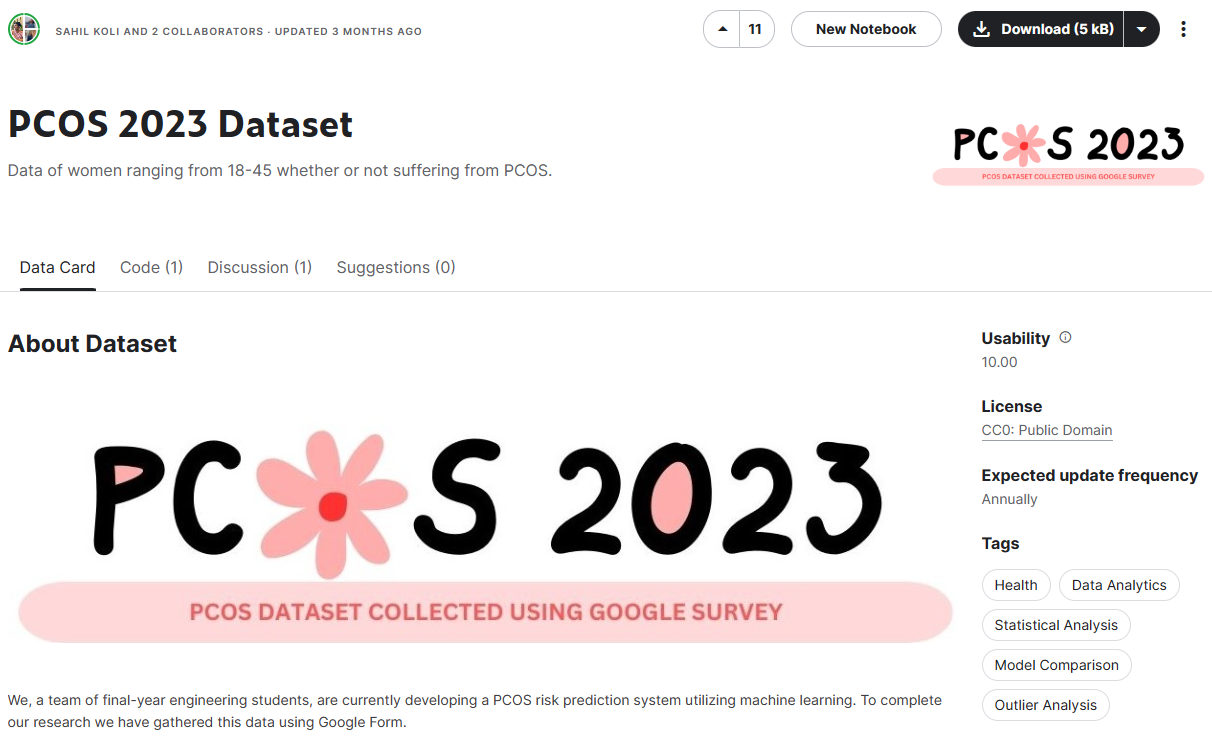

O dataset 2 [PCOS 2023 Dataset](https://www.kaggle.com/datasets/sahilkoli04/pcos2023) contém dados de 465 mulheres de 18 a 45 anos que responderam a um questionário coletado via Google Forms com perguntas simples, relacionando os sintomas mais comuns da doença. 

Temos 15 atributos que são informações coletadas de forma não invasiva, e nota-se que esse dataset possui menos features em comparação com o dataset 1. 

Também vale ressaltar que esse dataset é bem recente, publicado em 2023, e assim não identificamos artigos que fizessem uso dele. Ele, assim como o dataset 1, não foi publicado em conjunto com um artigo, o que poderia fazer com que nós questionássemos a validade desses dados, mas a descrição feita no Kaggle é aceitável e acompanha um vídeo que mostra como o processo de coleta dos dados foi feito. 

Também encontramos aqui um cenário bem diferente em relação ao dataset 1. Temos somente 15 atributos, que são relacionados somente à disfunção menstrual e ao hiperandrogenismo clínico.

Embora nós tenhamos menos informações, elas não são invasivas e são de fácil obtenção. Então nós poderíamos pensar em um sistema de triagem, em que as pacientes respondessem a perguntas simples e diretas, e a partir disso fossem encaminhadas para exames específicos para SOP ou a doença fosse descartada.


##### Importando dados e exibindo

In [20]:
dataset_2 = pd.read_csv("../data/dataset2-pcos-2023.csv")
dataset_2.head()

,Age (in Years),Weight (in Kg),Height (in Cm / Feet),Can you tell us your blood group ?,After how many months do you get your periods?\n(select 1- if every month/regular),Have you gained weight recently?,Do you have excessive body/facial hair growth ?,Are you noticing skin darkening recently?,Do have hair loss/hair thinning/baldness ?,Do you have pimples/acne on your face/jawline ?,Do you eat fast food regularly ?,Do you exercise on a regular basis ?,Have you been diagnosed with PCOS/PCOD?,Do you experience mood swings ?,Are your periods regular ?,"How long does your period last ? (in Days)\nexample- 1,2,3,4....."
0,21,47.0,168.0,13,1,0,0,0,0,0,0,0,0,1,1,6
1,21,45.0,156.0,11,1,0,0,1,1,1,0,0,0,1,1,4
2,17,37.0,162.0,15,1,0,0,0,0,1,1,0,0,1,1,6
3,28,54.0,160.0,15,1,0,0,0,0,0,0,0,0,1,1,4
4,45,40.0,150.0,13,2,0,0,0,1,0,0,0,1,1,0,7


Já é possível observar que o dataset 2 possui menos features que o dataset 1, mas que muitas perguntas são comuns a ambos.

##### Pré-processamento e Análise Exploratória dos Dados

In [21]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Age (in Years)                                                                     465 non-null    int64  
 1   Weight (in Kg)                                                                     465 non-null    float64
 2   Height (in Cm / Feet)                                                              465 non-null    float64
 3   Can you tell us your blood group ?                                                 465 non-null    int64  
 4   After how many months do you get your periods?
(select 1- if every month/regular)  465 non-null    int64  
 5   Have you gained weight recently?                                                   465 non-null    int64  

Organizando os nomes das colunas:

In [22]:
dataset_2=dataset_2.rename(columns={"Age (in Years)": "Idade",
                   "Weight (in Kg)": "Peso",
                   "Height (in Cm / Feet)": "Altura",
                   "Can you tell us your blood group ?": "Grupo ABO",
                   "After how many months do you get your periods?\n(select 1- if every month/regular)": "Intervalo entre ciclos",
                   "Have you gained weight recently?": "Ganho de peso",
                   "Are you noticing skin darkening recently?": "Hiperpigmentação da pele",
                   "Do have hair loss/hair thinning/baldness ?": "Queda de cabelo",
                   "Do you have pimples/acne on your face/jawline ?": "Acne",
                   "Do you eat fast food regularly ?": "Fast food regular",
                   "Do you exercise on a regular basis ?": "Atividade física regular",
                   "Have you been diagnosed with PCOS/PCOD?": "Diagnóstico SOP",
                   "Do you experience mood swings ?": "Alterações comportamentais",
                   "Are your periods regular ?": "Menstruação regular",
                   "Do you have excessive body/facial hair growth ?": "Hirsutismo",
                   "How long does your period last ? (in Days)\nexample- 1,2,3,4.....": "Duração do período menstrual"
                  })
dataset_2=dataset_2.drop(columns=['Intervalo entre ciclos','Alterações comportamentais','Grupo ABO']) # excluindo features
dataset_2 = dataset_2[['Diagnóstico SOP'] + sorted([col for col in dataset_2.columns if col != 'Diagnóstico SOP'])]

In [23]:
dataset_1 = dataset_1[sorted(dataset_1.columns)]

dataset_1.info()
dataset_1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 540
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Acne                          540 non-null    int64  
 1   Altura                        540 non-null    float64
 2   Atividade física regular      540 non-null    int64  
 3   Diagnóstico SOP               540 non-null    int64  
 4   Duração do período menstrual  540 non-null    int64  
 5   Fast food regular             539 non-null    float64
 6   Ganho de peso                 540 non-null    int64  
 7   Hiperpigmentação da pele      540 non-null    int64  
 8   Hirsutismo                    540 non-null    int64  
 9   Idade                         540 non-null    int64  
 10  Menstruação regular           540 non-null    int64  
 11  Peso                          540 non-null    float64
 12  Queda de cabelo               540 non-null    int64  
dtypes: float64

,Acne,Altura,Atividade física regular,Diagnóstico SOP,Duração do período menstrual,Fast food regular,Ganho de peso,Hiperpigmentação da pele,Hirsutismo,Idade,Menstruação regular,Peso,Queda de cabelo
0,0,152.0,0,0,5,1.0,0,0,0,28,1,44.6,0
1,0,161.5,0,0,5,0.0,0,0,0,36,1,65.0,0
2,1,165.0,0,1,5,1.0,0,0,0,33,1,68.8,1
3,0,148.0,0,0,5,0.0,0,0,0,37,1,65.0,0
4,0,161.0,0,0,5,0.0,0,0,0,25,1,52.0,1


O dataset não tem valores nulos, e em geral está bem organizado.

Observando a correlação entre cada variável e o Diagnóstico de SOP:

In [24]:
correlation_with_target_ds_2 = dataset_2.corr()['Diagnóstico SOP'].abs().sort_values(ascending=False)
print(correlation_with_target_ds_2)

Diagnóstico SOP                 1.000000
Menstruação regular             0.544719
Hirsutismo                      0.318353
Hiperpigmentação da pele        0.236946
Peso                            0.196552
Ganho de peso                   0.185950
Queda de cabelo                 0.126575
Acne                            0.125437
Duração do período menstrual    0.124593
Fast food regular               0.068979
Altura                          0.045123
Idade                           0.037577
Atividade física regular        0.013503
Name: Diagnóstico SOP, dtype: float64


Observando a correlação entre as features:

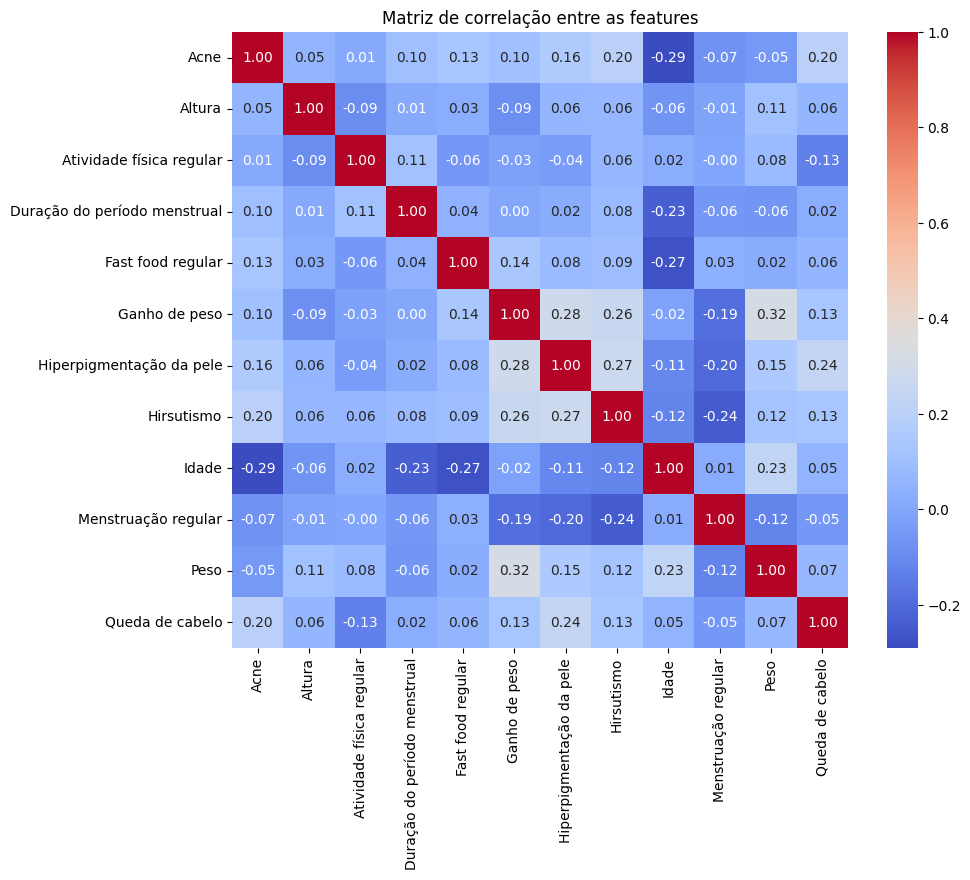

In [ ]:
features = dataset_2.drop(columns=['Diagnóstico SOP'])
correlation_matrix = features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de correlação entre as features')
plt.show()

As features nesse dataset também não têm alta correlação, e as cinco principais são:

* Menstruação regular
* Hirsutismo
* Hiperpigmentação da pele
* Peso
* Ganho de peso

O que se assemelha um pouco ao dataset 1 (hirsutismo, menstruação regular, ganho de peso e hiperpigmentação da pele também altos).

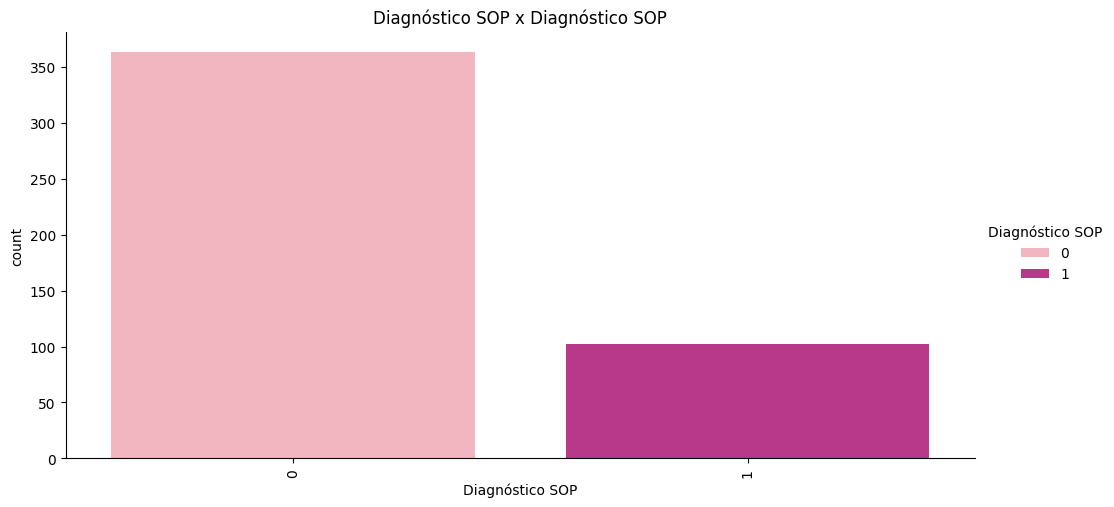

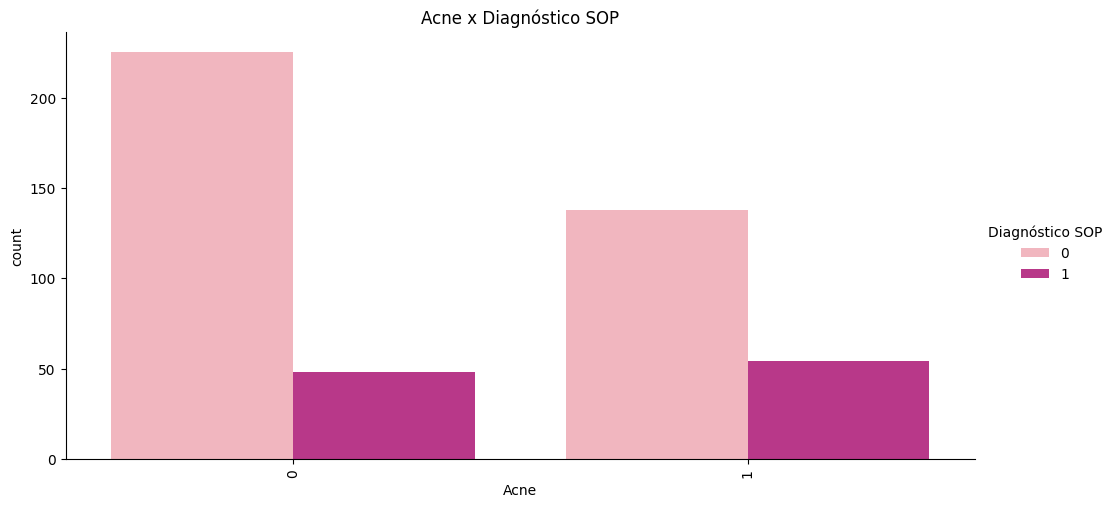

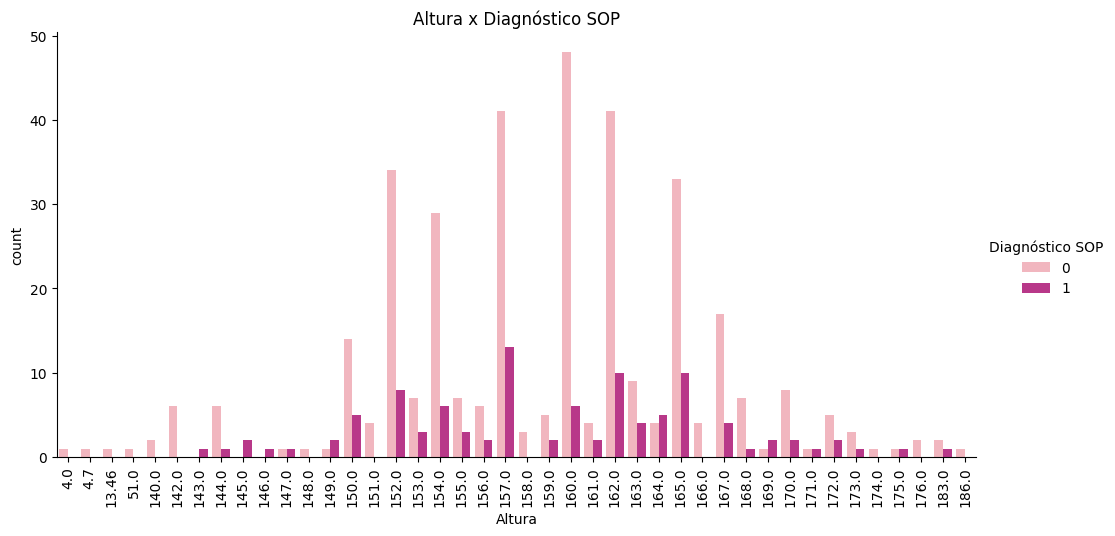

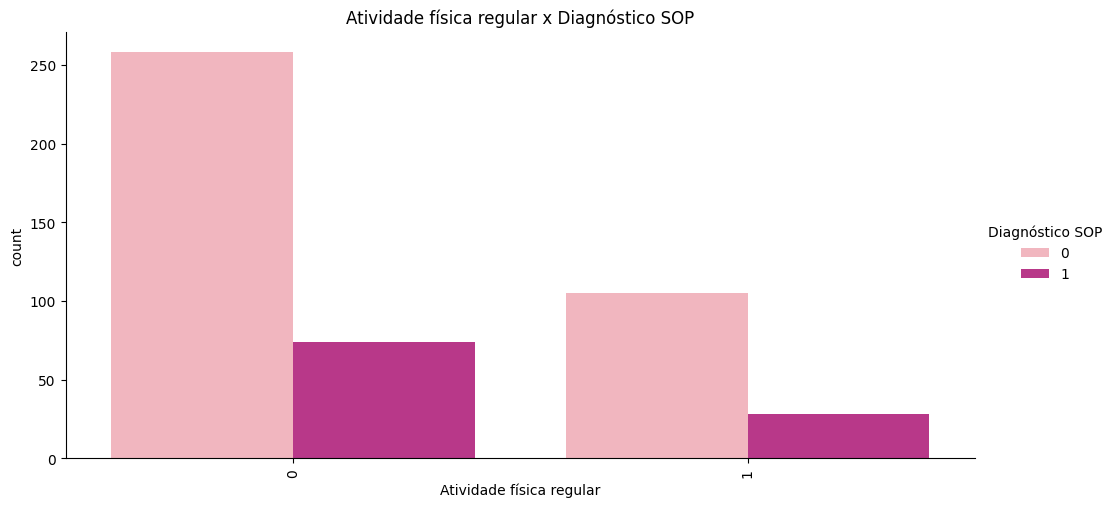

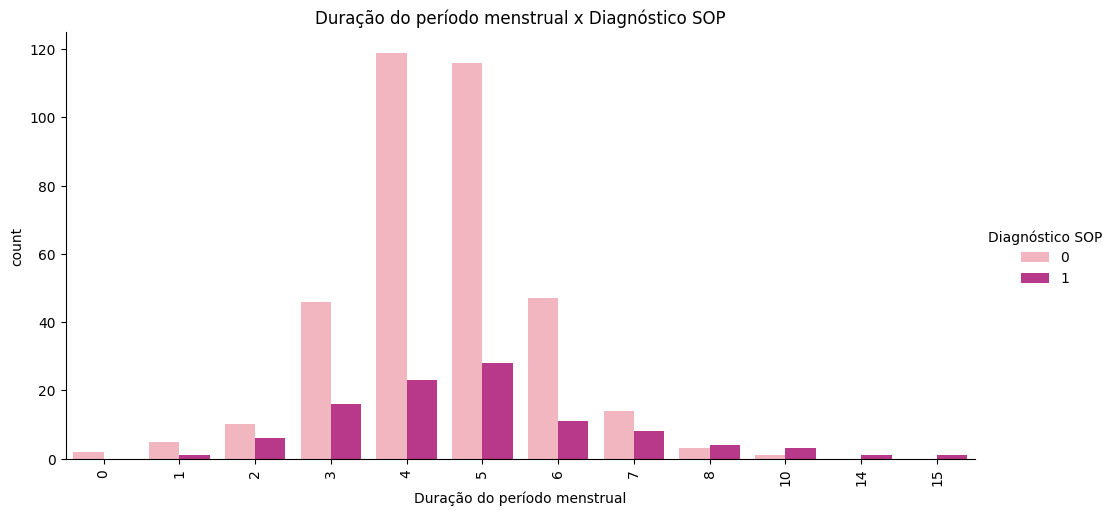

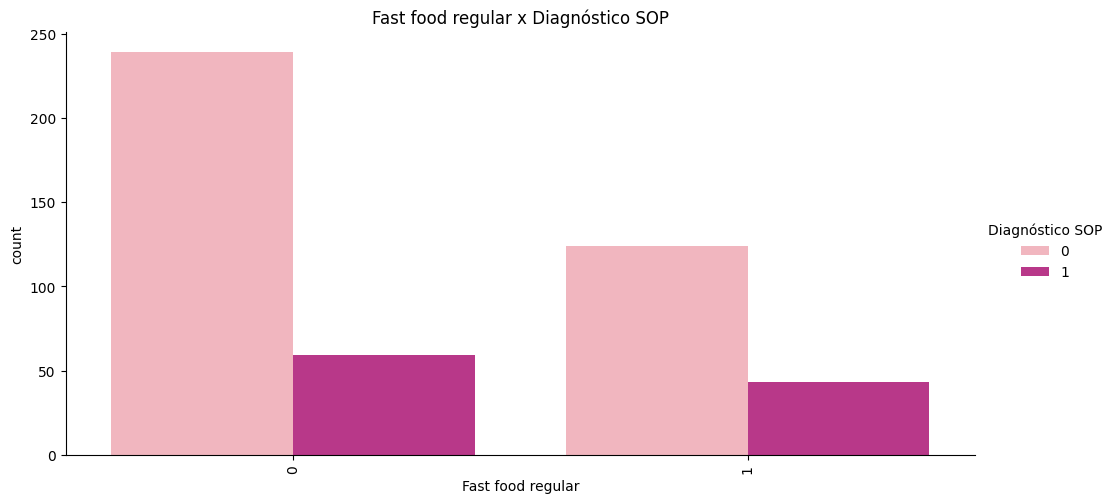

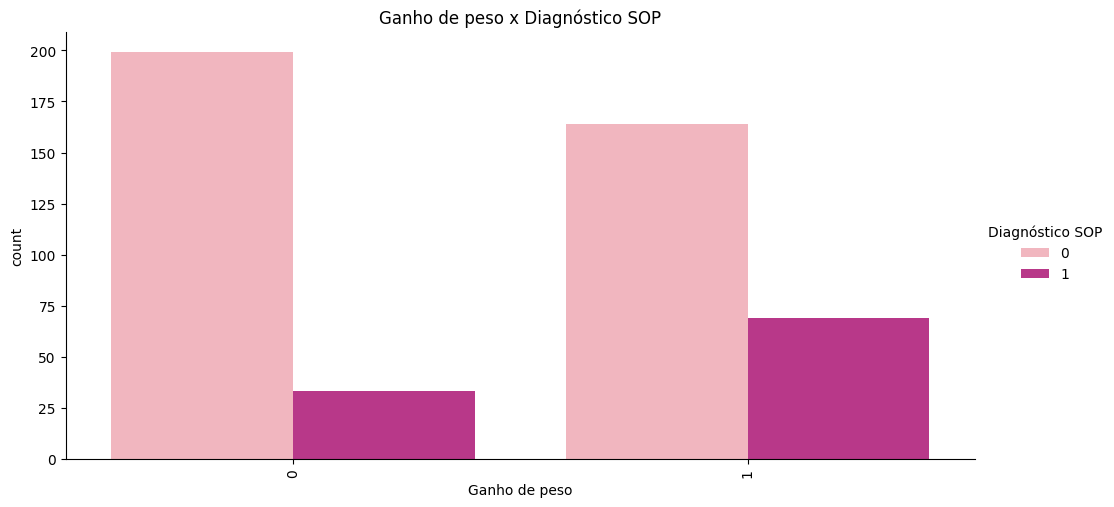

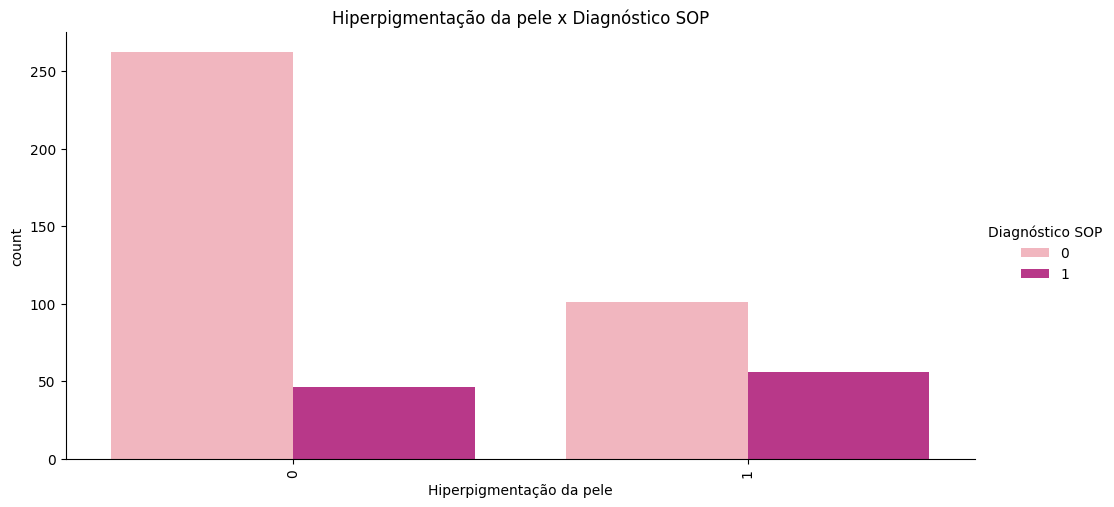

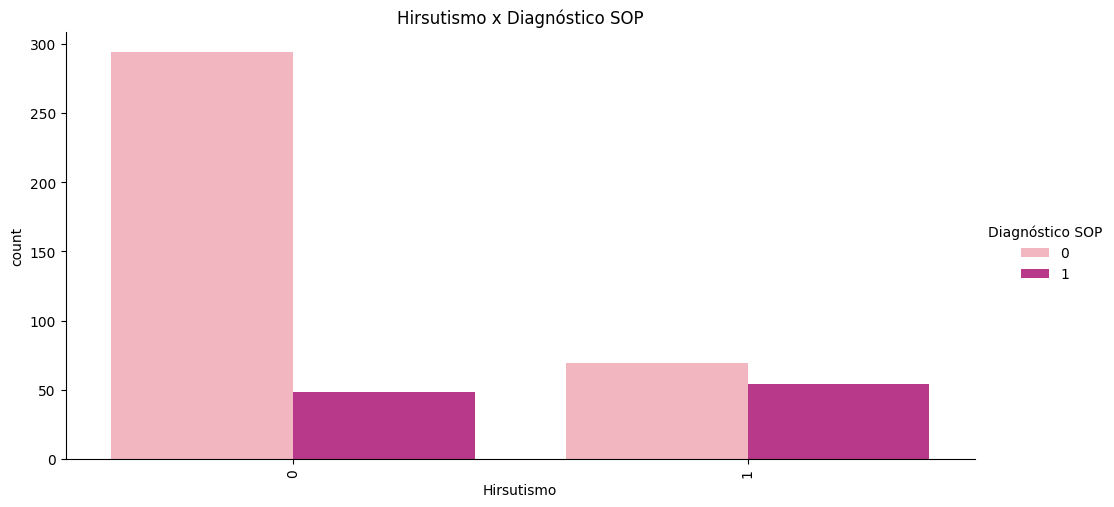

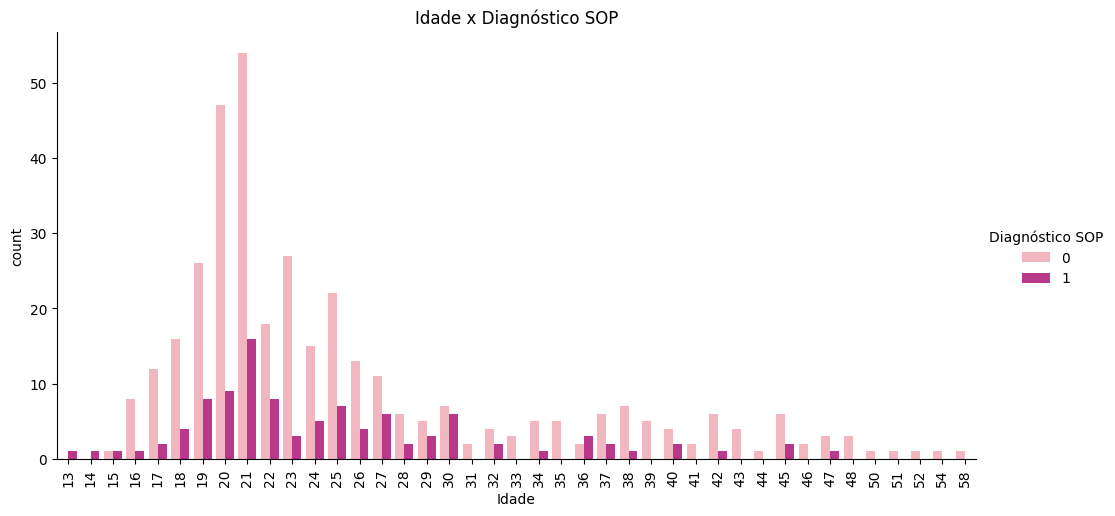

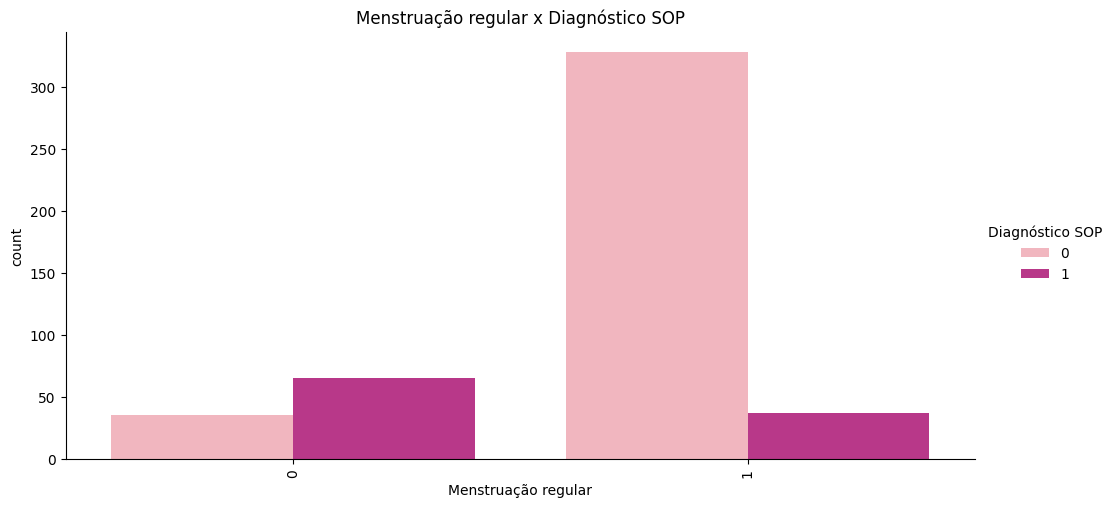

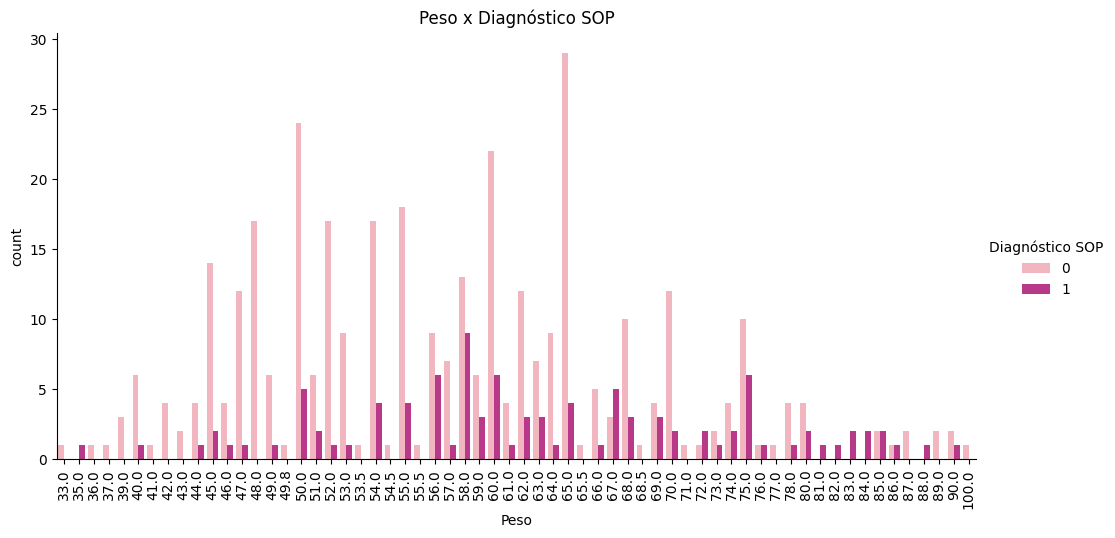

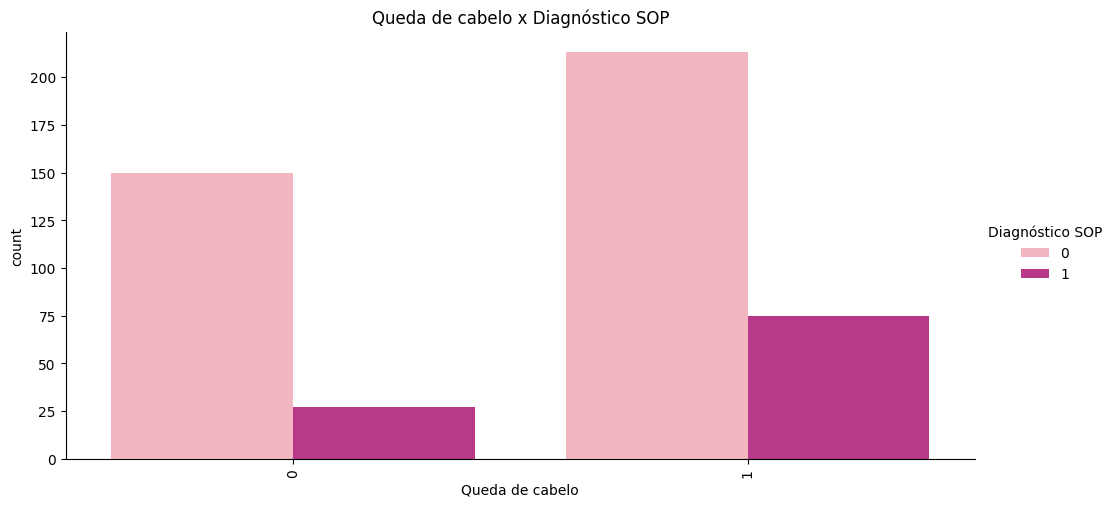

In [ ]:
for feature in dataset_2.columns:
    g = sns.catplot(data=dataset_2, x=feature, hue="Diagnóstico SOP", kind="count", palette="RdPu",height=5,aspect=2)
    g.set(title=f"{feature} x Diagnóstico SOP")
    g.set_xticklabels(rotation=90)
    plt.show()

Esse dataset é ainda bem mais desbalanceado do que o anterior em relação à variável alvo, o que também pode contribuir para viés em um modelo. As features têm uma distribuição similar ao dataset 1, porém com algumas diferenças.

* Algumas similaridades:
  * Em relação à variável **menstruação regular**, e é perceptível que em instâncias em que essa variável corresponde a 1 (sim), existem poucos casos de SOP; já nos casos em que a menstruação é irregular, a maior parte corresponde a casos de SOP;
* Algumas diferenças:
  * No caso da **acne**, por exemplo, nos casos em que não existe a presença desse sintoma, eles são majoritariamente diagnósticos negativos para a doença. Mas já em pacientes com acne, ao contrário do dataset 1, em que existe um equilíbrio entre casos de diagnóstico positivo e negativo, a maior parte não possui acne;
  * Em casos em que não houve **ganho de peso**, a maioria teve diagnóstico negativo, mas ao contrário do dataset 1, em que casos em que este sintoma está presente, observa-se que a maioria são casos de SOP, no dataset 2, a maior parte são diagnósticos negativos.
  
  De maneira geral, pode-se formular a hipótese de que o forte desbalanceamento entre as classes da variável alvo, no dataset 2, contribuiu para gerar algumas "anomalias" nos dados. Esperaria-se que em casos de ganho de peso, a maior parte dos dados também fosse de casos de SOP, por exemplo, o que talvez não ocorra aqui pois a quantidade de casos sem o diagnóstico da doença é tão grande que esse efeito é anulado.

  Outra hipótese é que simplesmente essa amostra seja uma representação de outro tipo de população: o ganho de peso não é algo incomum entre mulheres, mesmo as que não têm SOP, por exemplo.

#### Dataset Final: juntando os datasets 1 e 2 com as features comuns a ambos



Para obter o dataset final, foi necessário unir ambos os datasets 1 e 2, já tratados com apenas as features comuns a ambos:

In [ ]:
merge_datasets = pd.concat([dataset_1, dataset_2])

dataset_3 = merge_datasets.sample(frac=1).reset_index(drop=True)

dataset_3.info()

dataset_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Diagnóstico SOP               1004 non-null   int64  
 1   Acne                          1004 non-null   int64  
 2   Altura                        1004 non-null   float64
 3   Atividade física regular      1004 non-null   int64  
 4   Duração do período menstrual  1004 non-null   int64  
 5   Fast food regular             1004 non-null   int64  
 6   Ganho de peso                 1004 non-null   int64  
 7   Hiperpigmentação da pele      1004 non-null   int64  
 8   Hirsutismo                    1004 non-null   int64  
 9   Idade                         1004 non-null   int64  
 10  Menstruação regular           1004 non-null   int64  
 11  Peso                          1004 non-null   float64
 12  Queda de cabelo               1004 non-null   int64  
dtypes: 

,Diagnóstico SOP,Acne,Altura,Atividade física regular,Duração do período menstrual,Fast food regular,Ganho de peso,Hiperpigmentação da pele,Hirsutismo,Idade,Menstruação regular,Peso,Queda de cabelo
0,0,0,150.0,0,5,0,0,0,0,34,1,52.0,0
1,0,0,167.0,0,7,1,1,0,0,20,1,50.0,0
2,0,0,150.0,0,5,0,0,0,0,20,1,54.0,0
3,1,1,159.0,0,3,1,1,1,0,29,0,74.0,1
4,0,0,164.0,1,4,0,0,0,0,29,1,68.0,0


In [ ]:
dataset_3.to_csv('datasets-pcos.csv')

In [ ]:
correlation_with_target_ds_3 = dataset_3.corr()['Diagnóstico SOP'].abs().sort_values(ascending=False)
print(correlation_with_target_ds_3)

Diagnóstico SOP                 1.000000
Menstruação regular             0.464164
Hirsutismo                      0.397789
Hiperpigmentação da pele        0.363300
Ganho de peso                   0.309776
Fast food regular               0.260215
Acne                            0.225548
Peso                            0.203495
Queda de cabelo                 0.132426
Altura                          0.038102
Idade                           0.037547
Duração do período menstrual    0.034198
Atividade física regular        0.026968
Name: Diagnóstico SOP, dtype: float64


As cinco features de maior correlação:

* Menstruação regular
* Hirsutismo
* Hiperpigmentação da pele
* Ganho de peso
* Fast food regular

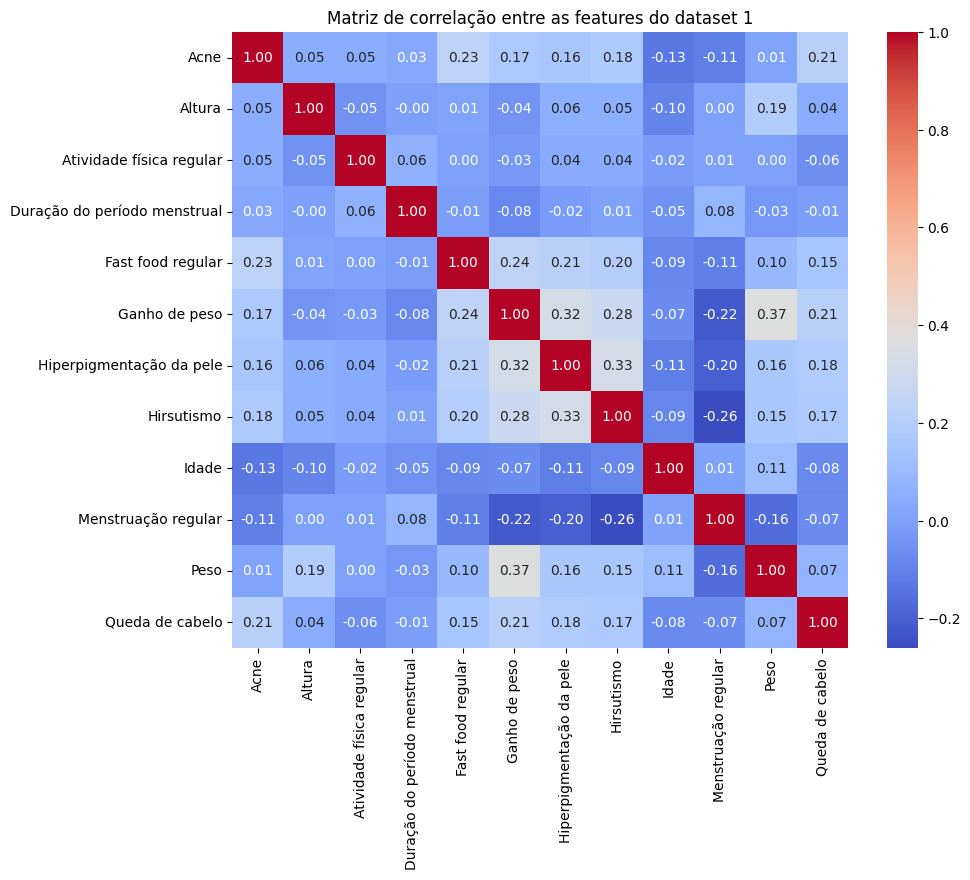

In [ ]:
features = dataset_3.drop(columns=['Diagnóstico SOP'])
correlation_matrix = features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de correlação entre as features do dataset 1')
plt.show()

Apenas **hiperpigmentação na pele** e **ganho de peso** parecem ter correlação um pouco alta com a feature **peso**, mas nada muito expressivo. Observando a distribuição das variáveis em cada feature:

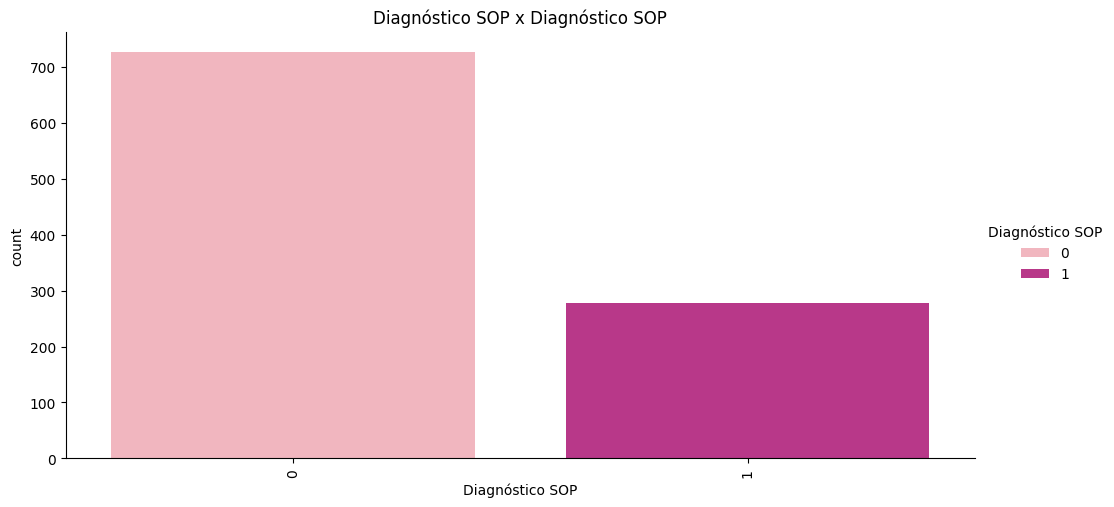

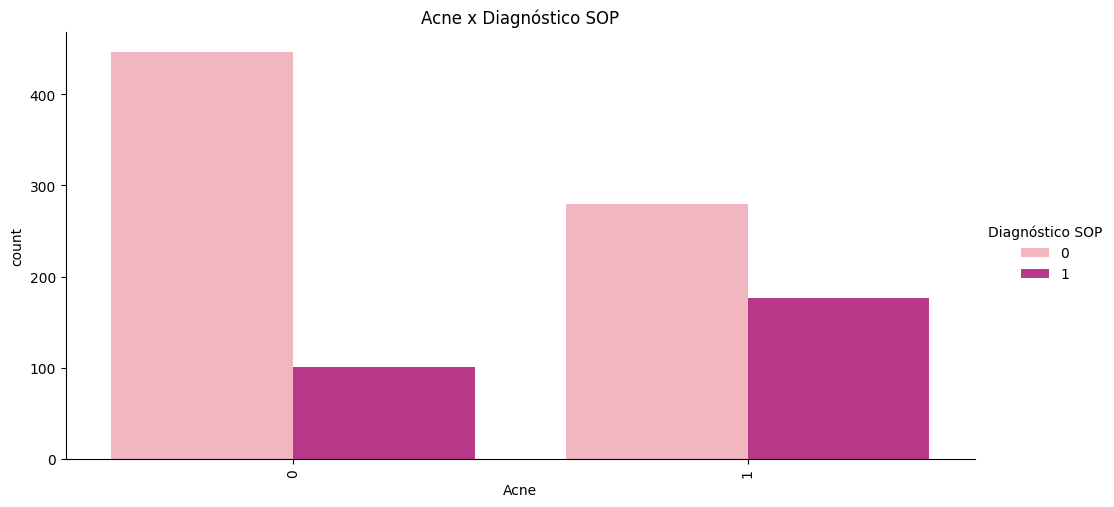

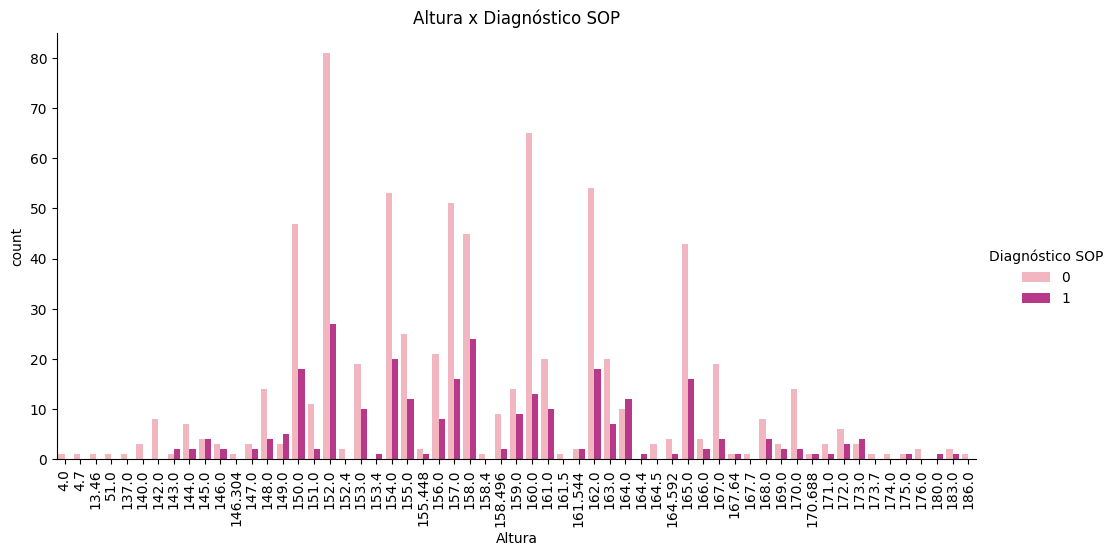

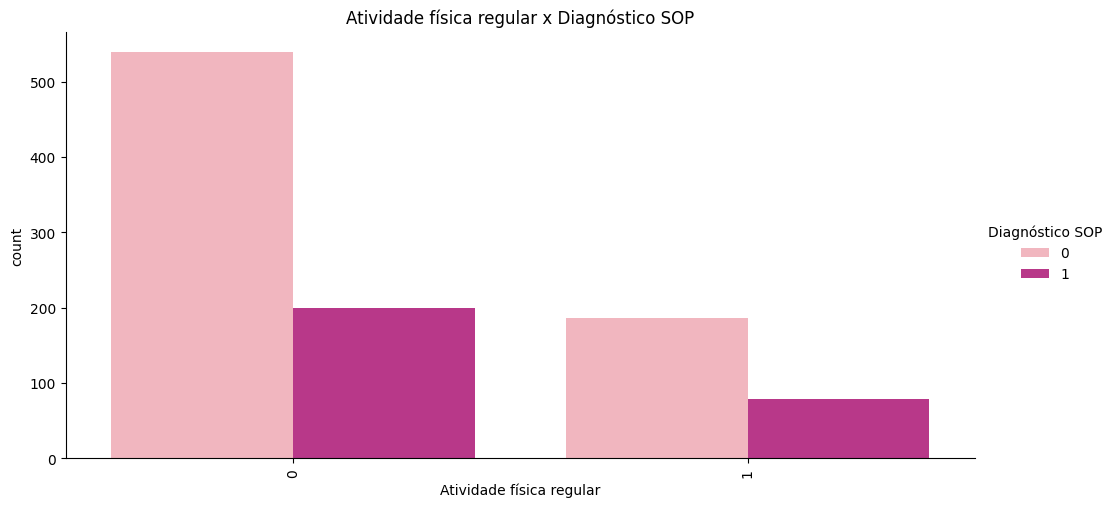

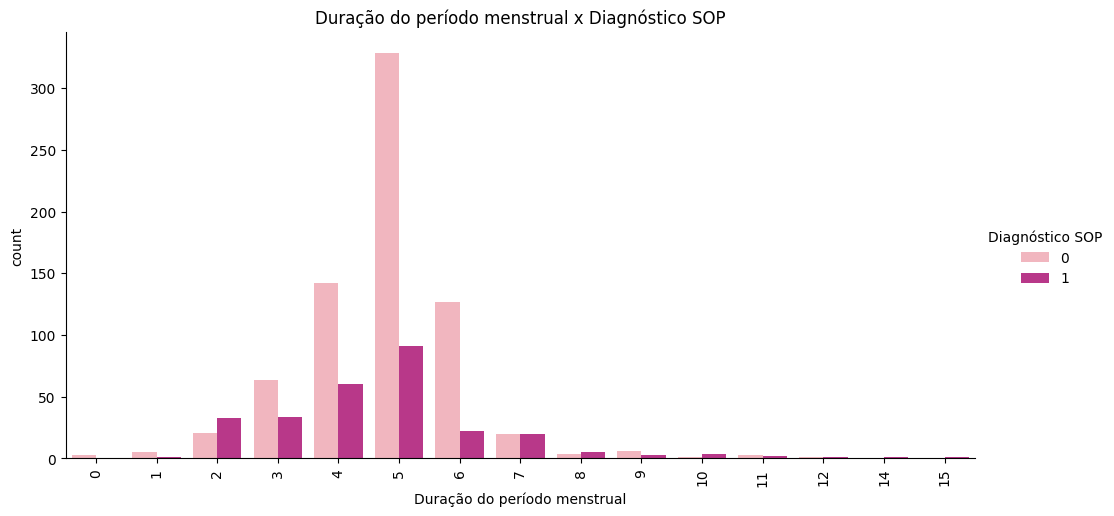

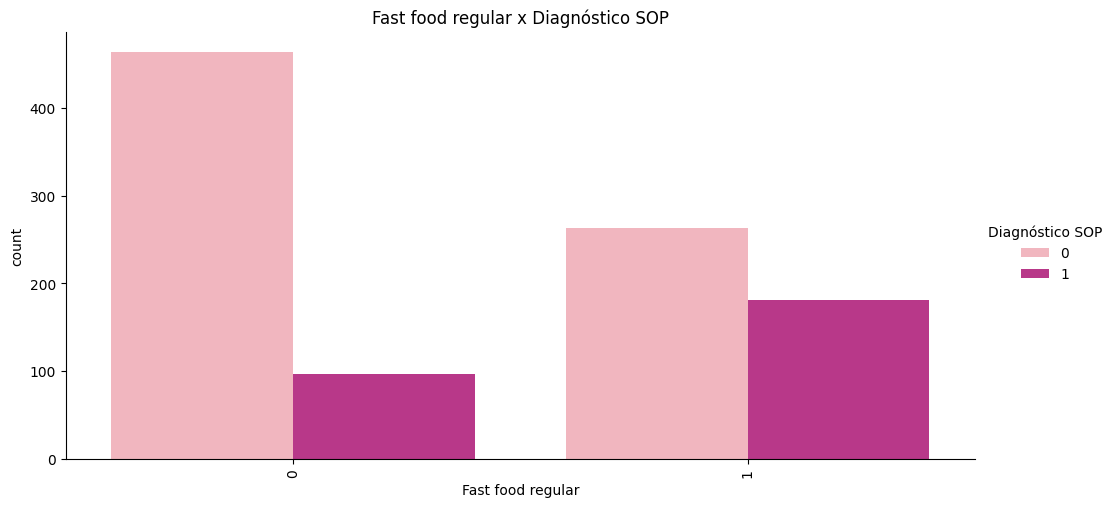

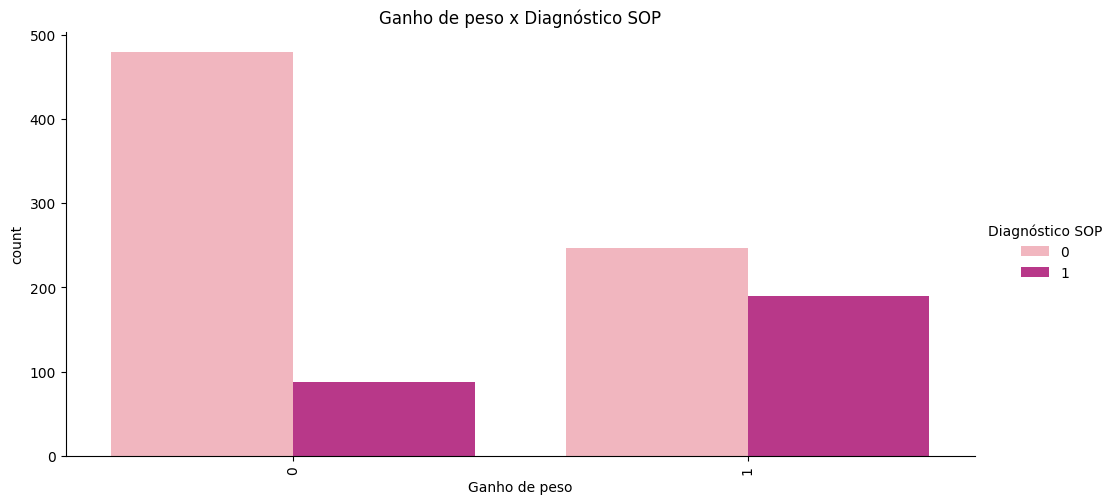

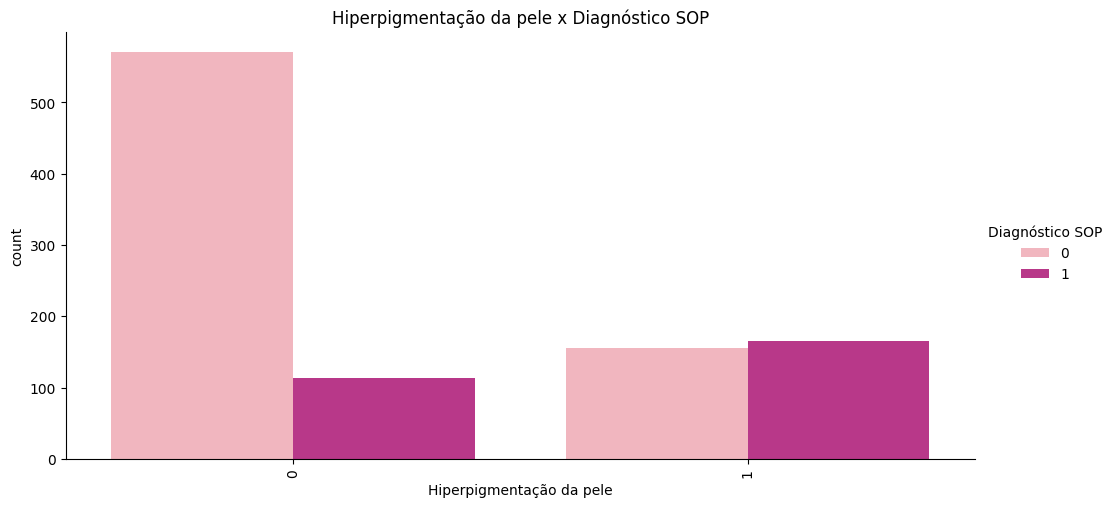

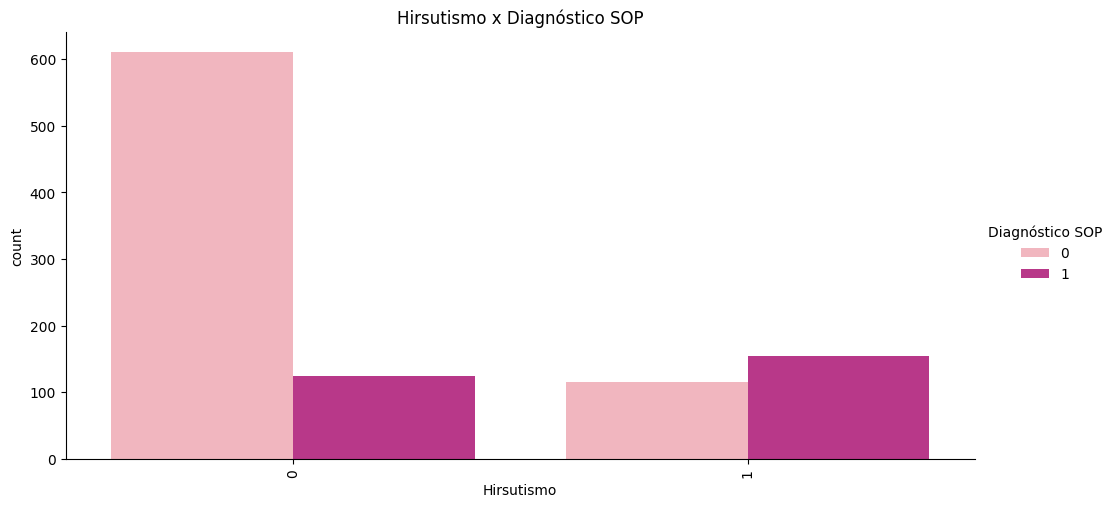

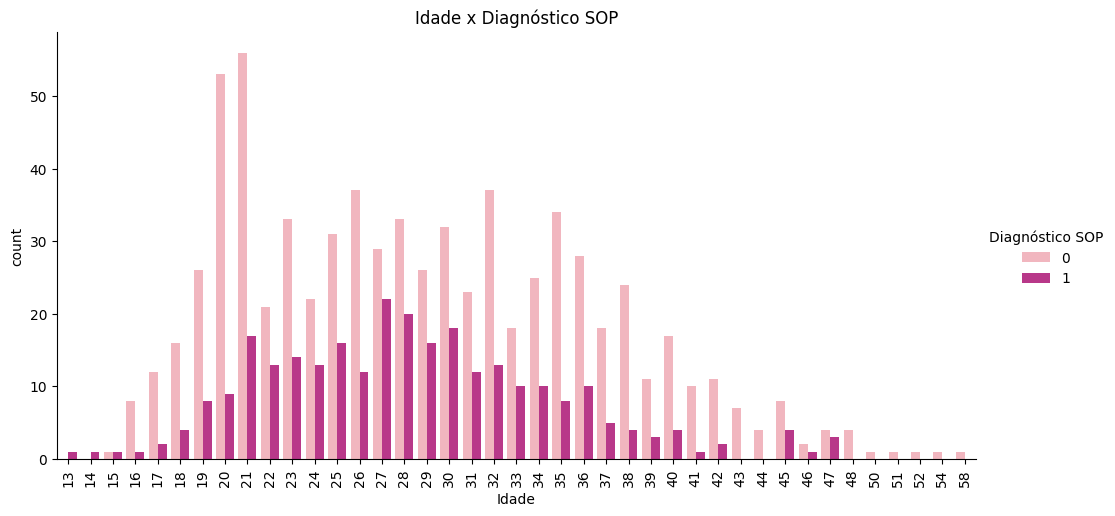

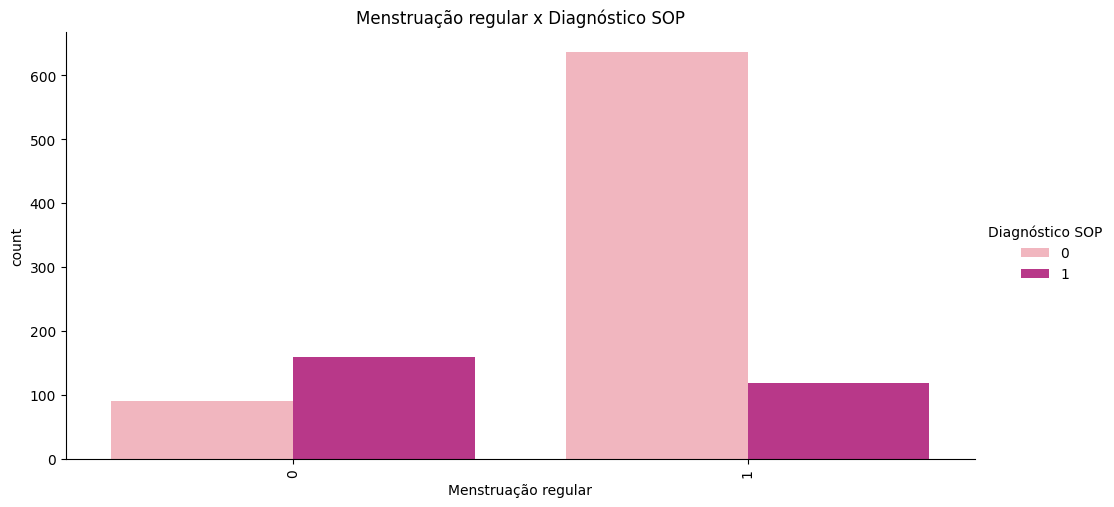

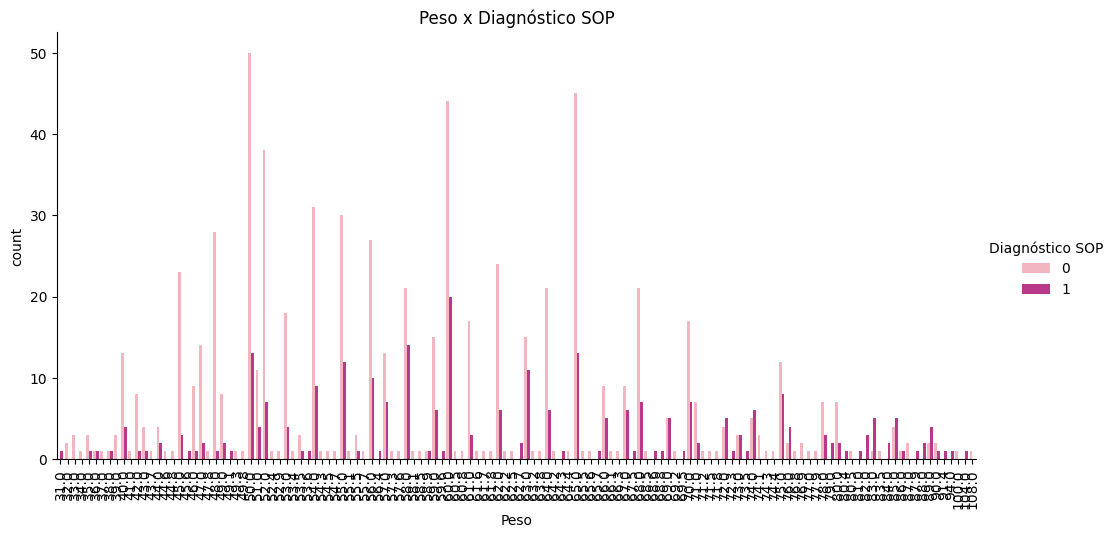

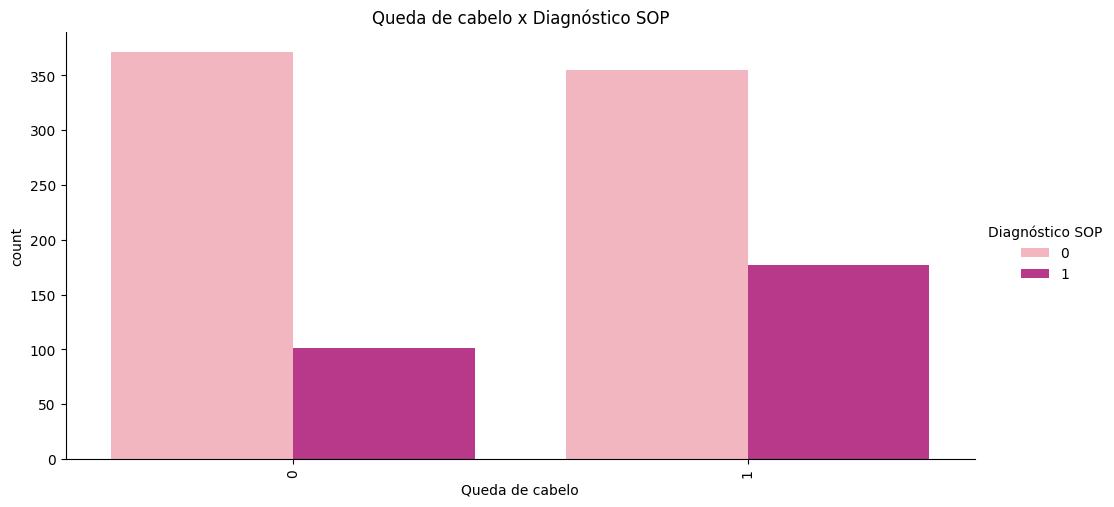

In [ ]:
for feature in dataset_3.columns:
    g = sns.catplot(data=dataset_3, x=feature, hue="Diagnóstico SOP", kind="count", palette="RdPu",height=5,aspect=2)
    g.set(title=f"{feature} x Diagnóstico SOP")
    g.set_xticklabels(rotation=90)
    plt.show()

O dataset 3 também é desbalanceado com relação à variável, o que faz sentido levando-se em conta que os 1 e 2 também são. Apesar disso, possui muito mais isntâncias referentes a cada classe.

A distribuição das features incorporou características de ambos os datasets, o que se alinha com o propósito do projeto de obter uma amostra mais representativa da realidade.

#### Standard Scaler

Aplicando standard scaler nas variáveis numéricas:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_numerical = scaler.fit_transform(dataset_3[['Altura', 'Peso', 'Idade']])
dataset_3[['Altura', 'Peso', 'Idade']] = scaled_numerical

dataset_3.head()

,Diagnóstico SOP,Acne,Altura,Atividade física regular,Duração do período menstrual,Fast food regular,Ganho de peso,Hiperpigmentação da pele,Hirsutismo,Idade,Menstruação regular,Peso,Queda de cabelo
0,1,1,0.618513,0,2,1,1,1,0,0.583411,0,1.493155,0
1,1,0,0.708647,0,3,1,0,1,1,-0.496054,1,-0.313328,1
2,0,0,-13.803036,1,4,1,1,0,0,-0.765920,1,1.493155,0
3,0,0,-0.282834,0,4,0,0,0,0,0.988210,1,1.131859,0
4,0,1,-0.463103,0,5,0,0,0,1,1.797809,1,-0.855272,0


#### Dividindo conjuntos de treinamento e de teste

In [ ]:
X = dataset_3.drop('Diagnóstico SOP', axis=1)
y = dataset_3['Diagnóstico SOP']

In [ ]:
y.value_counts()

,count
Diagnóstico SOP,
0,726
1,278


Utilizando stratified splitting, com o objetivo de manter as mesmas porcentagens das classes em cada split:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 42)

In [ ]:
y_train.value_counts()

,count
Diagnóstico SOP,
0,545
1,208


In [ ]:
y_test.value_counts()

,count
Diagnóstico SOP,
0,181
1,70


#### Oversampling com SMOTE

Usei como referência [esse notebook do Kaggle](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset#9.-SMOTE-(Synthetic-Minority-Oversampling-Technique)) para aplicar o SMOTE, e utilizei SMOTE porque foi a técnica implementada por Khanna et al.



In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

In [ ]:
y_train_resampled.value_counts()

,count
Diagnóstico SOP,
1,545
0,545
